In [ ]:
import numpy as np
import seaborn as snus
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/turkiye-student-evaluation_R_Specific.csv')

#**Анализ данных:**


Здесь представлены данные опроса студентов о курсе, который они изучают. В частности, здесь есть два типа данных: 


> **instr, class, repeat, attendance, difficulty**- представляют собой статистическу информацию, полученную в процессе обучения студента. 


> **Q1-Q28** - вопросы со степенью согласия, т.е. студенту было необходимо указать, насколько он согласен с тем или иным выражением, где 1 - полностью не согласен, а 5 - полностью согласен.


Тем не менее, эти вопросы можно поделить на **две подгруппы:**


1.   **Q1-Q12** - Вопросы относительно самого курса, процесса обучения, материалов и прочего.
2.   **Q13-Q28** - вопросы о работе инструктора













Соответственно, можно выявить такие задачи, которые можно решить с помощью этих данных: 

1.   Как актуальность курса, используемые материалы и возможности, соответствие ожиданий и реальности влияет на посещаемость курса.
2.   На основании ответов студентов на вопросы Q13-Q28 можно выявить лучшего и худшего инструктора
3.   Выявить недостатки курса: например, если неуместные материалы используются в процессе, или необхоидмо переработать программу курса.



Attribute Information:

instr: Instructor's identifier; values taken from {1,2,3}

class: Course code (descriptor); values taken from {1-13}

repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}

attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}

difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}

Q1: The semester course content, teaching method and evaluation system were provided at the start.

Q2: The course aims and objectives were clearly stated at the beginning of the period.

Q3: The course was worth the amount of credit assigned to it.

Q4: The course was taught according to the syllabus announced on the first day of class.

Q5: The class discussions, homework assignments, applications and studies were satisfactory.

Q6: The textbook and other courses resources were sufficient and up to date.

Q7: The course allowed field work, applications, laboratory, discussion and other studies.

Q8: The quizzes, assignments, projects and exams contributed to helping the learning.

Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.

Q10: My initial expectations about the course were met at the end of the period or year.

Q11: The course was relevant and beneficial to my professional development.

Q12: The course helped me look at life and the world with a new perspective.

Q13: The Instructor's knowledge was relevant and up to date.

Q14: The Instructor came prepared for classes.

Q15: The Instructor taught in accordance with the announced lesson plan.

Q16: The Instructor was committed to the course and was understandable.

Q17: The Instructor arrived on time for classes.

Q18: The Instructor has a smooth and easy to follow delivery/speech.

Q19: The Instructor made effective use of class hours.

Q20: The Instructor explained the course and was eager to be helpful to 
students.

Q21: The Instructor demonstrated a positive approach to students.

Q22: The Instructor was open and respectful of the views of students about the course.

Q23: The Instructor encouraged participation in the course.

Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.

Q25: The Instructor responded to questions about the course inside and outside of the course.

Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.

Q27: The Instructor provided solutions to exams and discussed them with students.

Q28: The Instructor treated all students in a right and objective manner.

In [ ]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
1,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty'], axis=1, inplace=True)
len(df_copy)

5820

1. Рассмотрим, как связаны между собой два признака: посещаемость и сложность курса

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


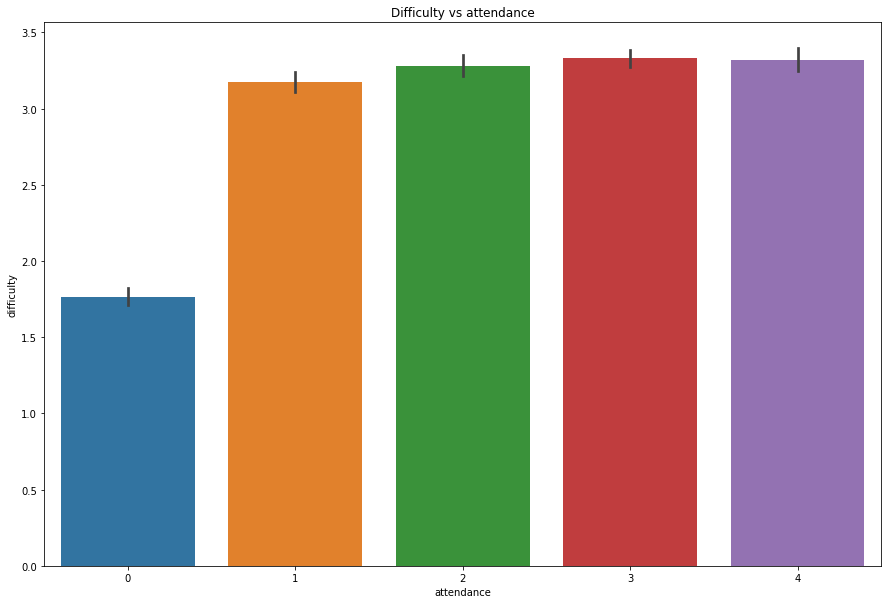

In [ ]:
ydata = df['attendance']
xdata = df['difficulty']
plt.figure(figsize=(15, 10))
snus.barplot(ydata, xdata)
plt.title('Difficulty vs attendance')
# plt.ylim([3.5, 5.0])
plt.show()

Интересно, что там где сложнее всего- посещаемость средняя, на "троечку", однако там, где легче всего - посещаемость нулевая.

2. Рассмотрим, как то, что курс эффективен для дальнейшей работы и полезен влияет на посещаемость.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


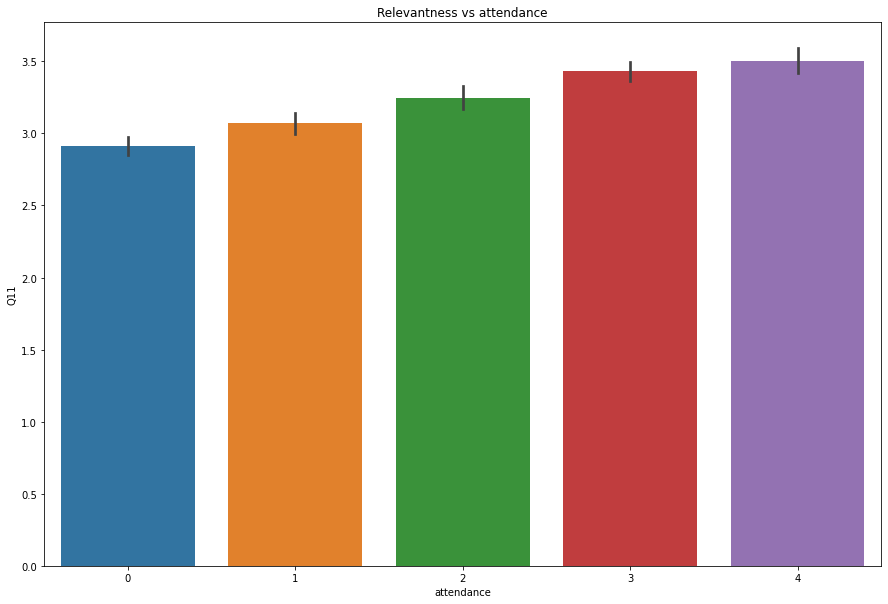

In [ ]:
ydata = df['attendance']
xdata = df['Q11']
plt.figure(figsize=(15, 10))
snus.barplot(ydata, xdata)
plt.title('Relevantness vs attendance')
# plt.ylim([3.5, 5.0])
plt.show()

Интересно то, что посещаемость курса напрямую зависит от того, актуален ли и полезен ли данный курс для будущей работы.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


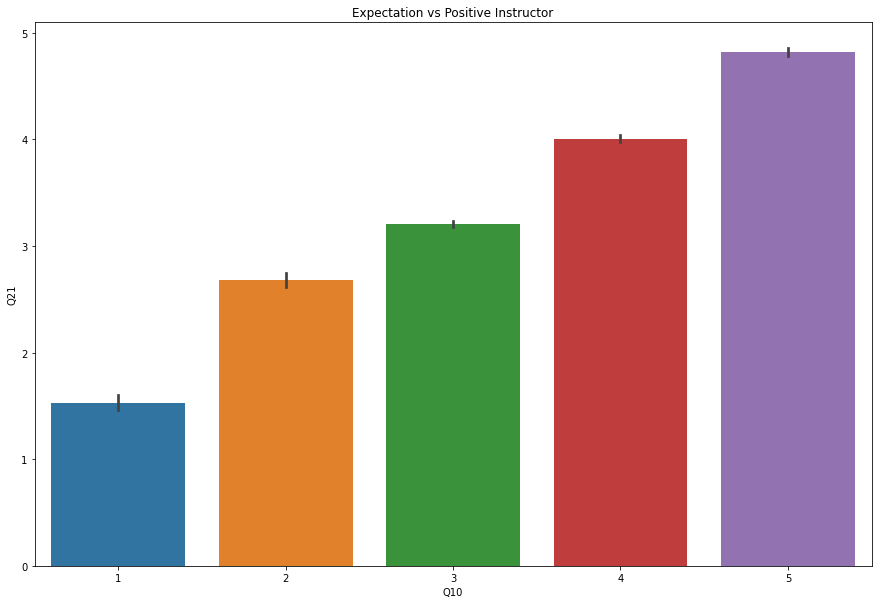

In [ ]:
ydata = df['Q10']
xdata = df['Q21']
plt.figure(figsize=(15, 10))
snus.barplot(ydata, xdata)
plt.title('Expectation vs Positive Instructor')
# plt.ylim([3.5, 5.0])
plt.show()

Снова можно заметить, что оправдание ожиданий от курса прямопропорционально подходу преподавателя, причем очень сильно: ожидания не оправдывались тогда, когда позитивный подход учителя был минимален, и наоборот, оправдывались полностью, там где подход учителя был оценен на "5"

#**Анализ данных по одной группе**


###Определяем количество групп и выбираем одну из них

In [ ]:
df['class'].unique()

array([ 2,  7, 10,  1,  6, 11, 13,  3,  4,  5,  8,  9, 12])

In [ ]:
df_group = pd.DataFrame(df[df['class'] == 8])
df_group

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
3967,3,8,3,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5
3968,3,8,3,3,4,1,3,4,2,3,4,2,2,2,3,4,4,4,5,4,4,4,4,4,4,4,4,3,3,4,3,3,4
3969,3,8,3,1,2,1,1,3,1,1,1,1,1,4,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3970,3,8,2,3,4,1,1,3,1,3,2,1,1,4,1,3,1,4,3,4,4,4,4,4,3,5,5,3,3,4,3,4,5
3971,3,8,1,1,3,1,1,2,2,2,4,3,2,3,2,4,3,2,4,3,3,4,3,4,4,4,4,1,2,2,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,3,8,1,0,1,1,4,2,2,4,3,2,3,4,4,5,4,3,4,4,4,3,2,4,4,4,4,3,2,2,4,4,4
4463,3,8,1,4,3,1,1,2,1,2,3,2,1,3,3,2,2,3,3,3,2,4,1,3,2,1,3,2,2,3,3,2,3
4464,3,8,1,3,4,2,3,3,4,4,4,4,2,3,3,4,2,4,4,4,3,5,3,4,5,5,5,5,3,4,3,3,4
4465,3,8,1,0,3,4,5,5,5,3,4,3,2,4,3,5,4,5,5,5,5,5,4,5,5,5,5,5,3,5,4,4,5


###**Анализируем на выбросы с помощью boxplot.** 

Там, где точки - это выбросы, при этом стоит учесть, что например столбец nb.repeat указывает на то, сколько раз человек брал курсы, и поэтому выкидывать примеры, где люди брали один и тот же курс - не стоит, поскольку это важная информация.


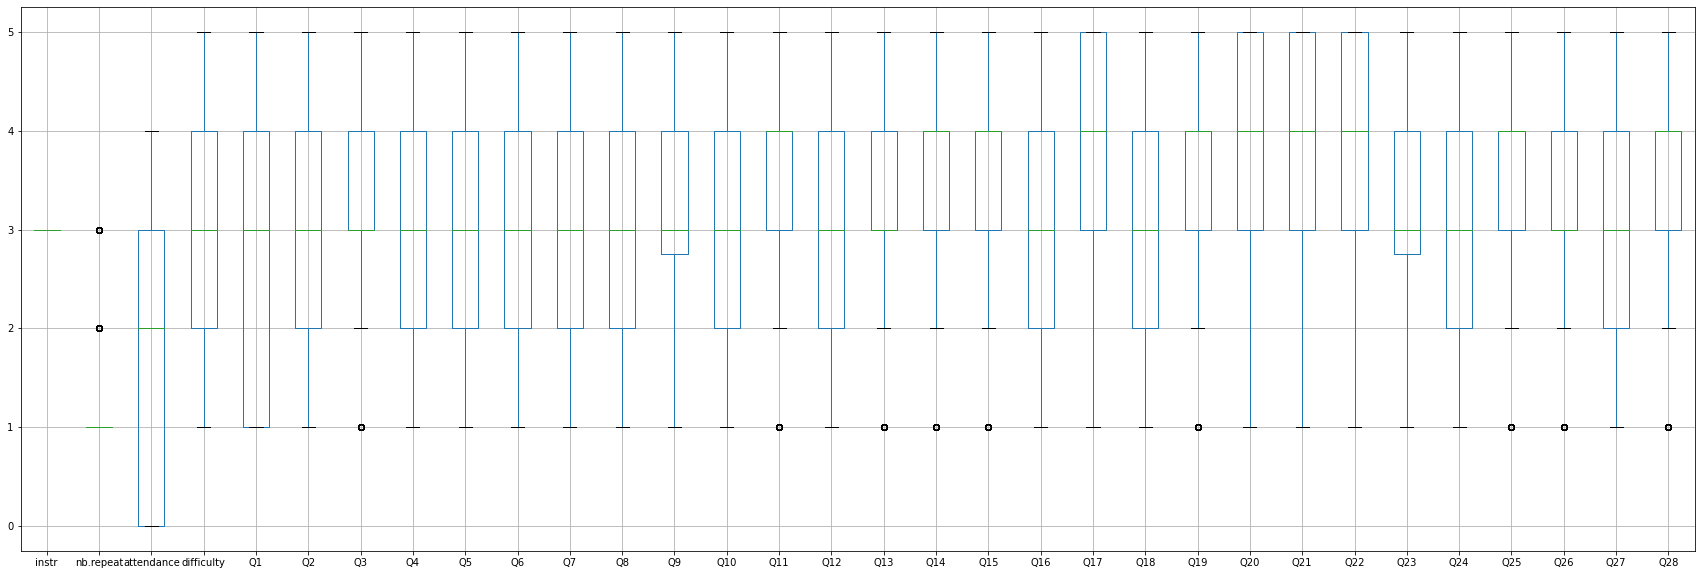

In [ ]:
df_group.drop(['class'], axis=1).boxplot(figsize=(30, 10))

Удаляем их:

In [ ]:
anomaly_columns_list = ['Q3', 'Q11', 'Q13', 'Q14', 'Q15', 'Q19', 'Q25', 'Q26', 'Q28']
df_group_wo_anomaly = df_group.copy()
for col in anomaly_columns_list:
  df_group_wo_anomaly = pd.DataFrame(df_group_wo_anomaly[df_group_wo_anomaly[col] != 1])
df_group_wo_anomaly

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
3967,3,8,3,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5
3968,3,8,3,3,4,1,3,4,2,3,4,2,2,2,3,4,4,4,5,4,4,4,4,4,4,4,4,3,3,4,3,3,4
3970,3,8,2,3,4,1,1,3,1,3,2,1,1,4,1,3,1,4,3,4,4,4,4,4,3,5,5,3,3,4,3,4,5
3971,3,8,1,1,3,1,1,2,2,2,4,3,2,3,2,4,3,2,4,3,3,4,3,4,4,4,4,1,2,2,3,4,3
3972,3,8,2,1,3,2,3,4,3,3,4,2,2,3,3,3,2,3,3,3,4,4,4,3,4,4,5,4,3,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,3,8,1,0,1,1,4,2,2,4,3,2,3,4,4,5,4,3,4,4,4,3,2,4,4,4,4,3,2,2,4,4,4
4463,3,8,1,4,3,1,1,2,1,2,3,2,1,3,3,2,2,3,3,3,2,4,1,3,2,1,3,2,2,3,3,2,3
4464,3,8,1,3,4,2,3,3,4,4,4,4,2,3,3,4,2,4,4,4,3,5,3,4,5,5,5,5,3,4,3,3,4
4465,3,8,1,0,3,4,5,5,5,3,4,3,2,4,3,5,4,5,5,5,5,5,4,5,5,5,5,5,3,5,4,4,5


Для того, чтобы найти все точки выбросов - можно использовать методы кластеризации, и если какая-то точка не принадлежит ни одному кластеру - ее можно считать выбросом.

DBScan is a clustering algorithm that’s used cluster data into groups. It is also used as a density-based anomaly detection method with either single or multi-dimensional data.

In [ ]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(df_group_wo_anomaly)
start_index = df_group_wo_anomaly.index.values.tolist()[0]
df_group_wo_anomaly.drop([ind + start_index  for ind, val in enumerate(clusters) if val == -1 and (ind + start_index) in df_group_wo_anomaly.index], inplace=True)

Так же, если например посещение нулевое, однако человек поставил супер высокие оценки на опросе- можно считать такую оценку неадекватной.

---



In [ ]:
df_group_wo_anomaly.drop([ind for ind, r in df_group_wo_anomaly.iterrows() if r['attendance'].item() == 0 and r.mean(axis=0) >= 4.5 ], inplace=True)

Проверяем пропущенные данные:

In [ ]:
df_group_wo_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 3977 to 4466
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       235 non-null    int64
 1   class       235 non-null    int64
 2   nb.repeat   235 non-null    int64
 3   attendance  235 non-null    int64
 4   difficulty  235 non-null    int64
 5   Q1          235 non-null    int64
 6   Q2          235 non-null    int64
 7   Q3          235 non-null    int64
 8   Q4          235 non-null    int64
 9   Q5          235 non-null    int64
 10  Q6          235 non-null    int64
 11  Q7          235 non-null    int64
 12  Q8          235 non-null    int64
 13  Q9          235 non-null    int64
 14  Q10         235 non-null    int64
 15  Q11         235 non-null    int64
 16  Q12         235 non-null    int64
 17  Q13         235 non-null    int64
 18  Q14         235 non-null    int64
 19  Q15         235 non-null    int64
 20  Q16         235 non-null    

In [ ]:
#Check for Missing Values after Concatination

obs = df_group_wo_anomaly.isnull().sum().sort_values(ascending = False)
percent = round(df_group_wo_anomaly.isnull().sum().sort_values(ascending = False)/len(df_group_wo_anomaly)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

,Number of Observations,Percent
Q28,0,0.0
Q11,0,0.0
class,0,0.0
nb.repeat,0,0.0
attendance,0,0.0
difficulty,0,0.0
Q1,0,0.0
Q2,0,0.0
Q3,0,0.0
Q4,0,0.0


Таковых нетю, уря

###**Анализ на основе описательных статистик.**


In [ ]:
from scipy import stats
for col in list(df_copy.columns):
  # normality test
  stat, p = stats.shapiro(df_group_wo_anomaly[col])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print(f'The column {col} looks Gaussian (fail to reject H0)')
  else:
    print(f'The column {col}  does not look Gaussian (reject H0)')

Statistics=0.913, p=0.000
The column Q1  does not look Gaussian (reject H0)
Statistics=0.907, p=0.000
The column Q2  does not look Gaussian (reject H0)
Statistics=0.875, p=0.000
The column Q3  does not look Gaussian (reject H0)
Statistics=0.912, p=0.000
The column Q4  does not look Gaussian (reject H0)
Statistics=0.909, p=0.000
The column Q5  does not look Gaussian (reject H0)
Statistics=0.904, p=0.000
The column Q6  does not look Gaussian (reject H0)
Statistics=0.907, p=0.000
The column Q7  does not look Gaussian (reject H0)
Statistics=0.910, p=0.000
The column Q8  does not look Gaussian (reject H0)
Statistics=0.904, p=0.000
The column Q9  does not look Gaussian (reject H0)
Statistics=0.903, p=0.000
The column Q10  does not look Gaussian (reject H0)
Statistics=0.870, p=0.000
The column Q11  does not look Gaussian (reject H0)
Statistics=0.908, p=0.000
The column Q12  does not look Gaussian (reject H0)
Statistics=0.871, p=0.000
The column Q13  does not look Gaussian (reject H0)
Statisti

## Следовательно, следует принять гипотезы о том, что данные в опросе не распределены нормально.


Построим графики, показывающие это:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


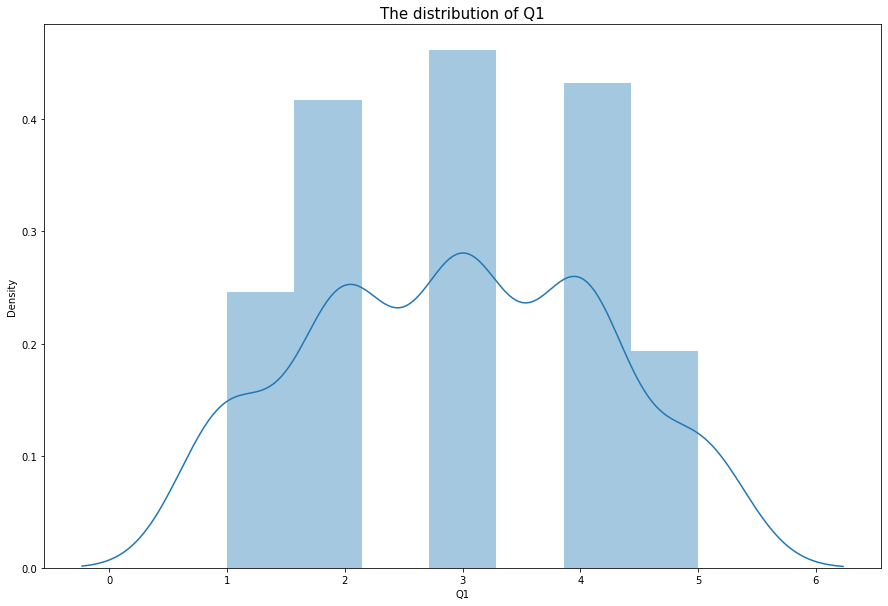

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


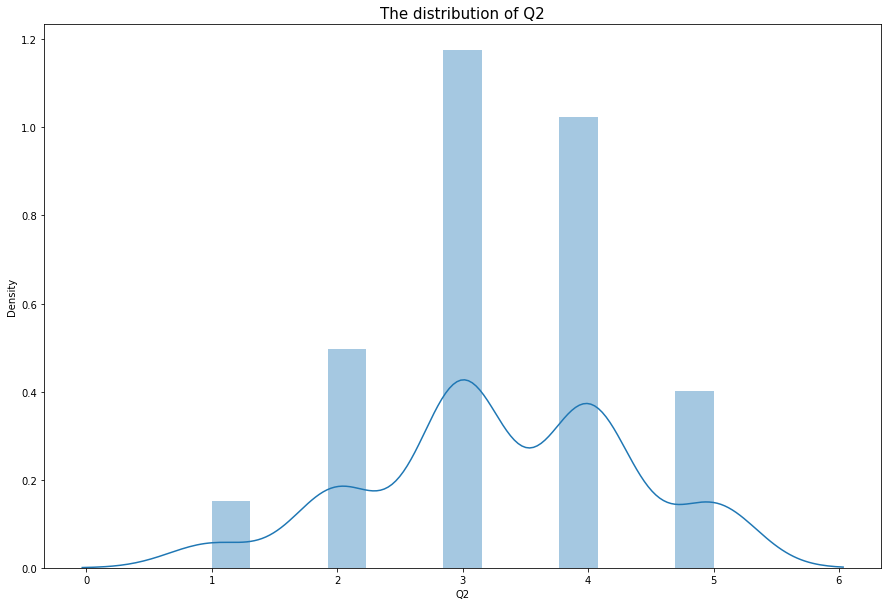

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


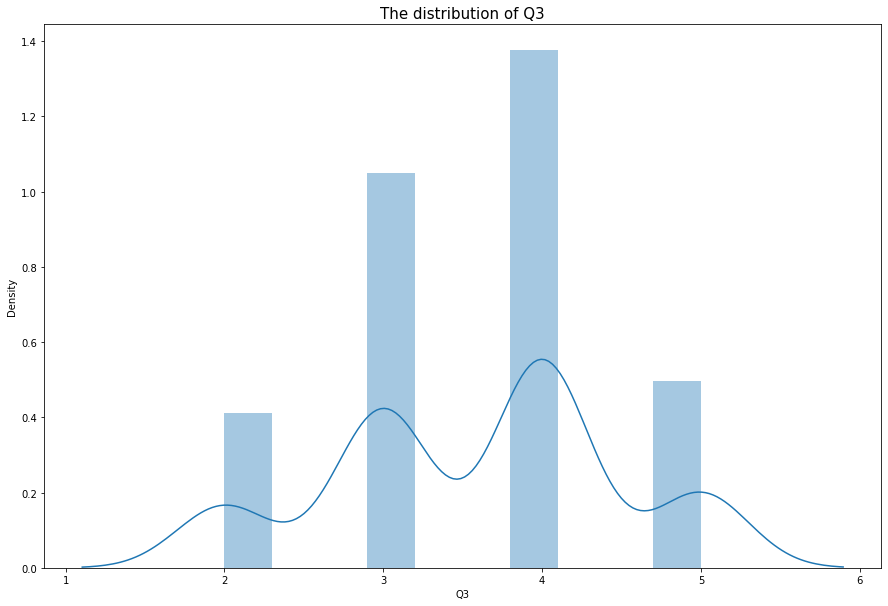

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


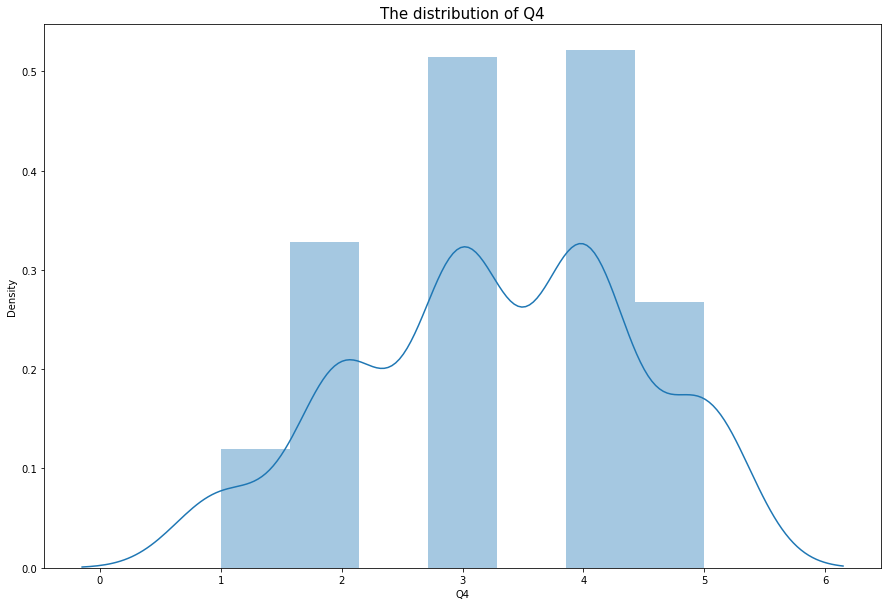

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


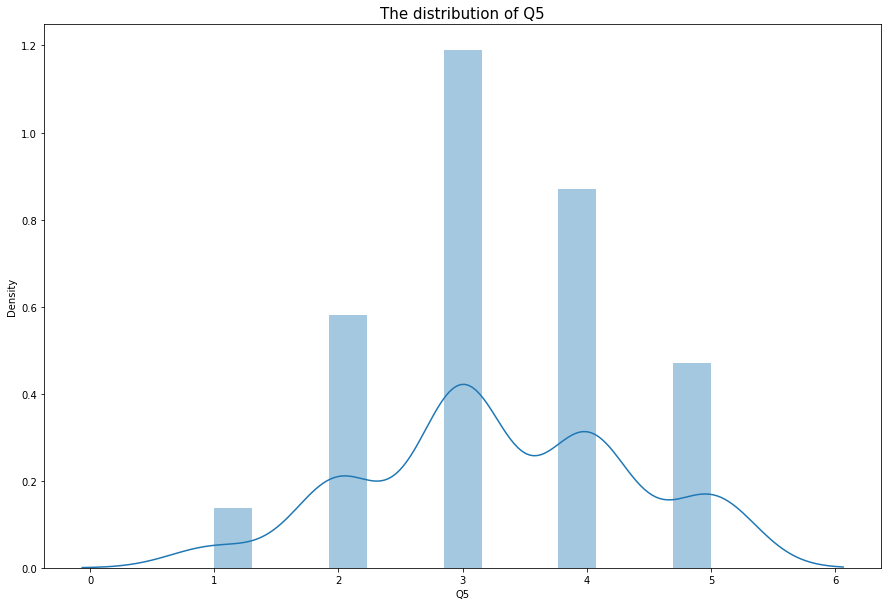

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


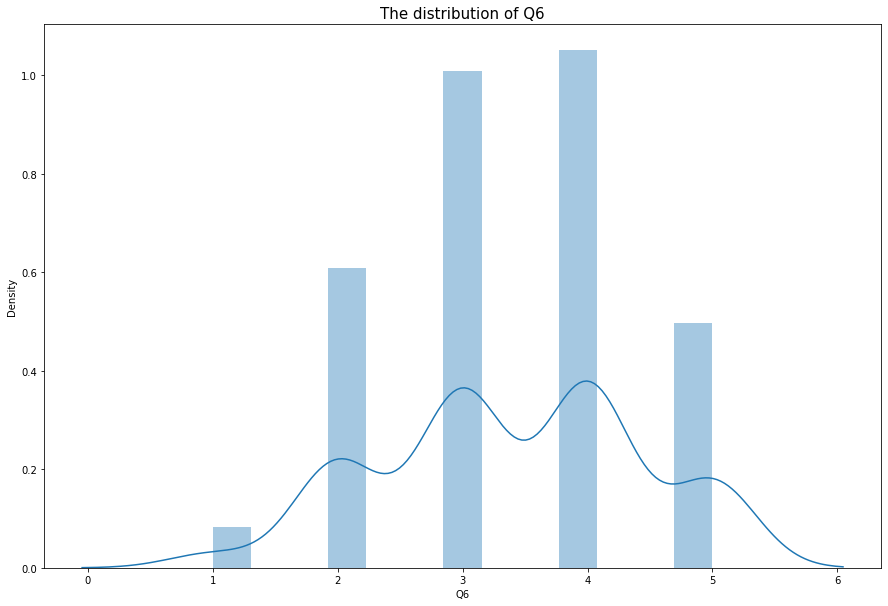

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


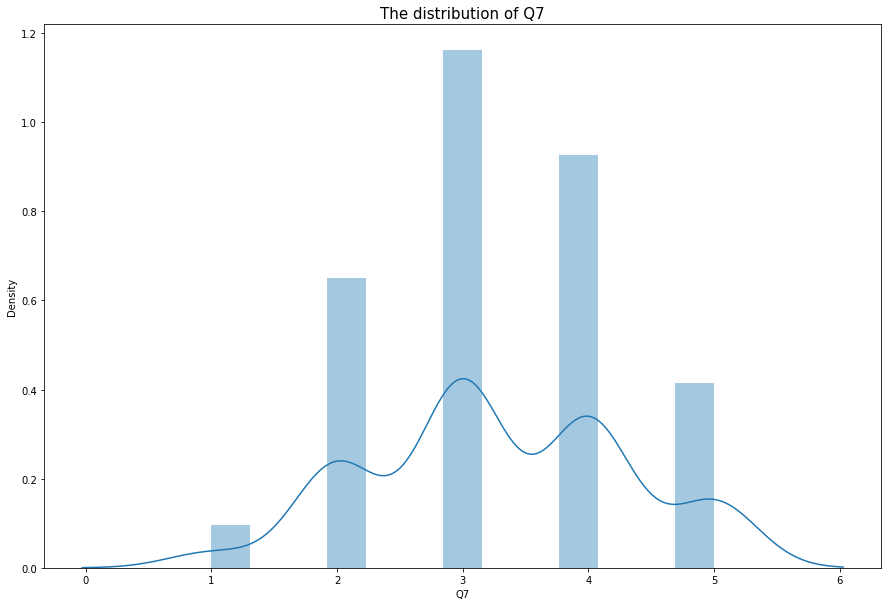

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


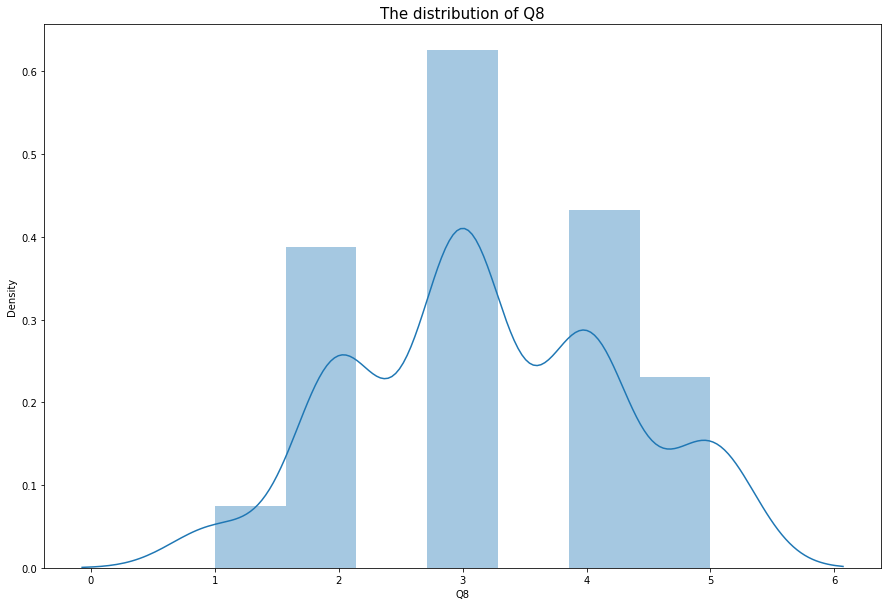

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


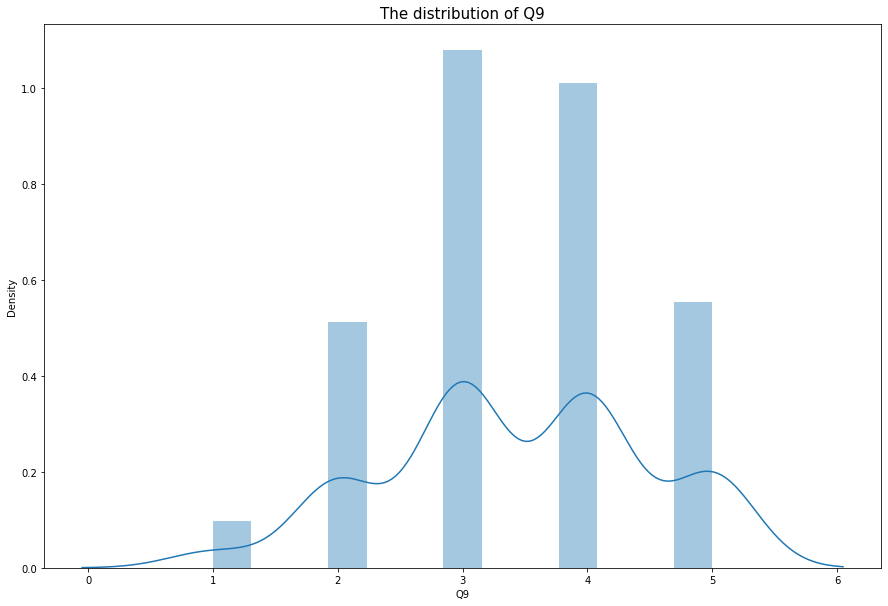

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


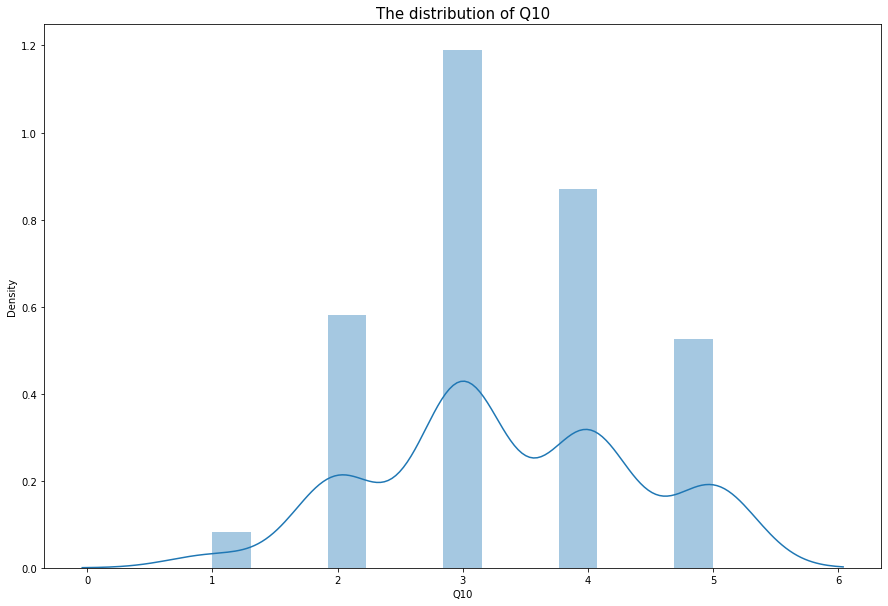

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


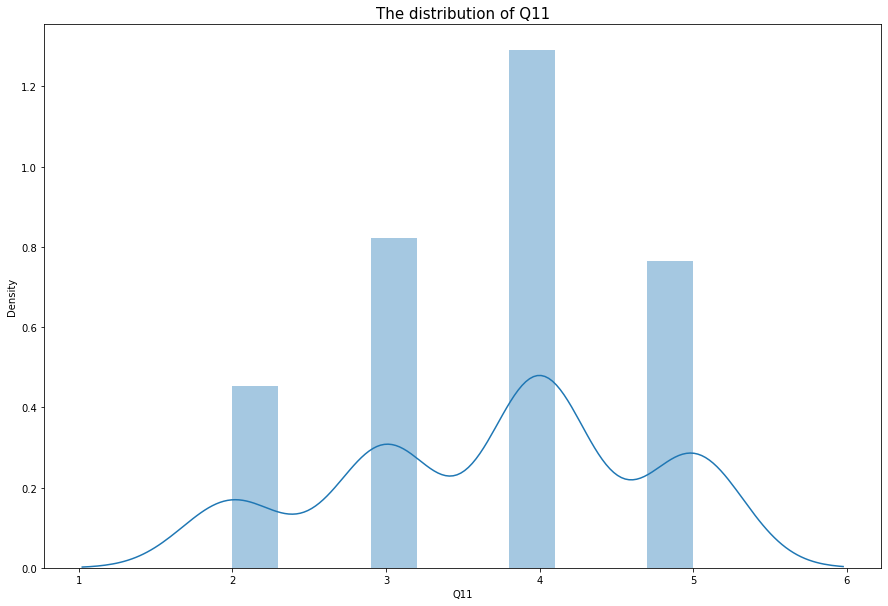

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


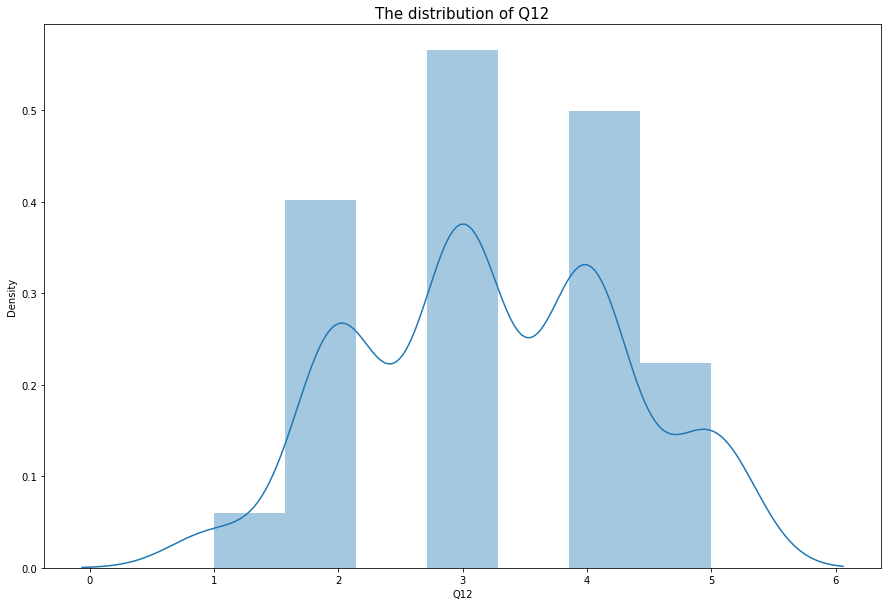

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


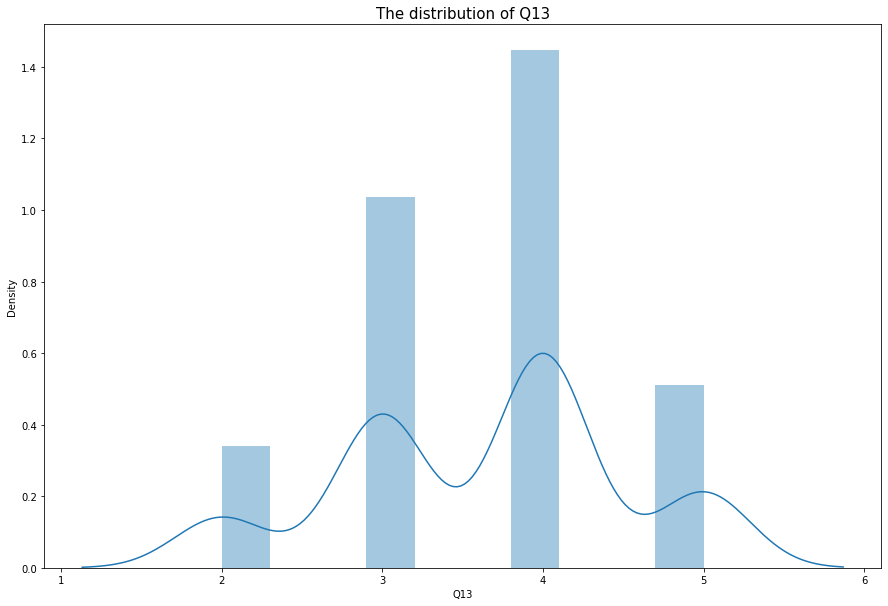

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


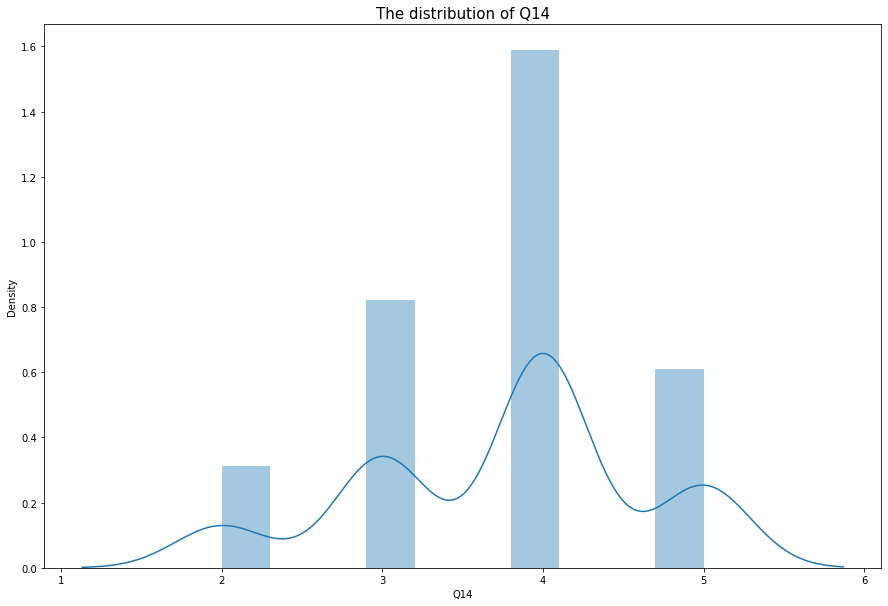

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


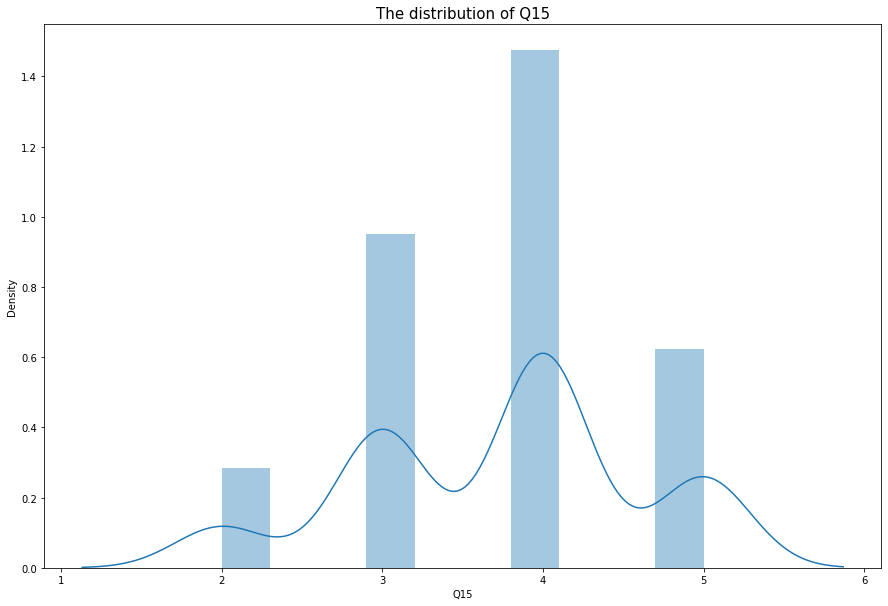

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


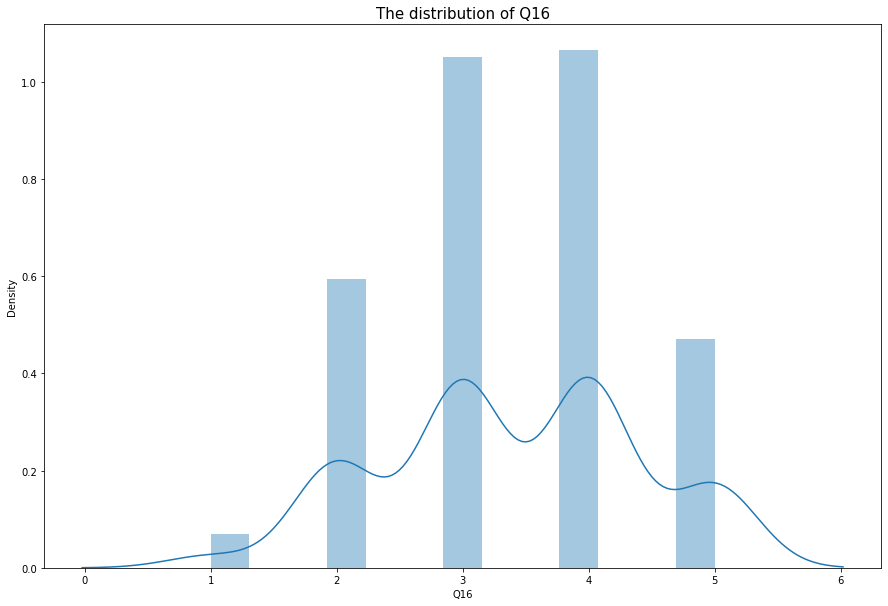

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


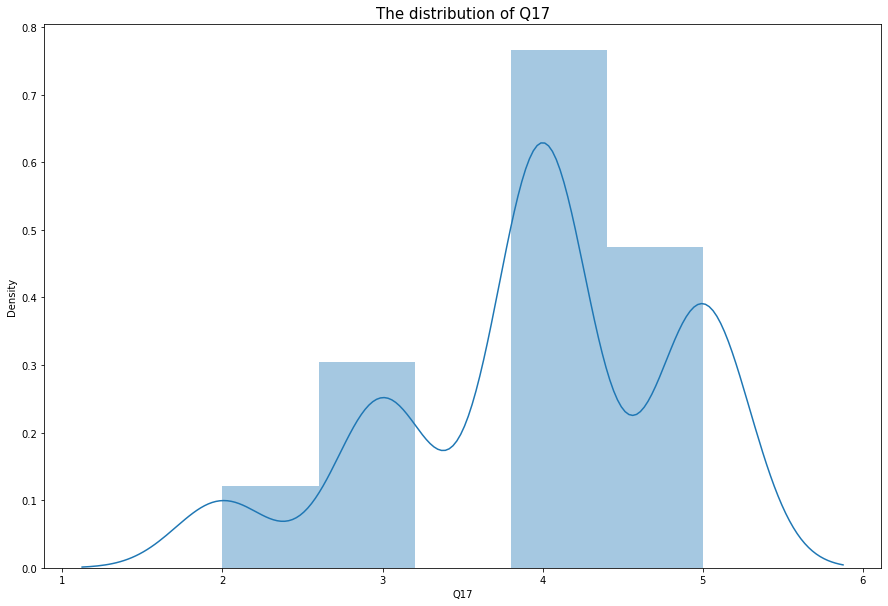

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


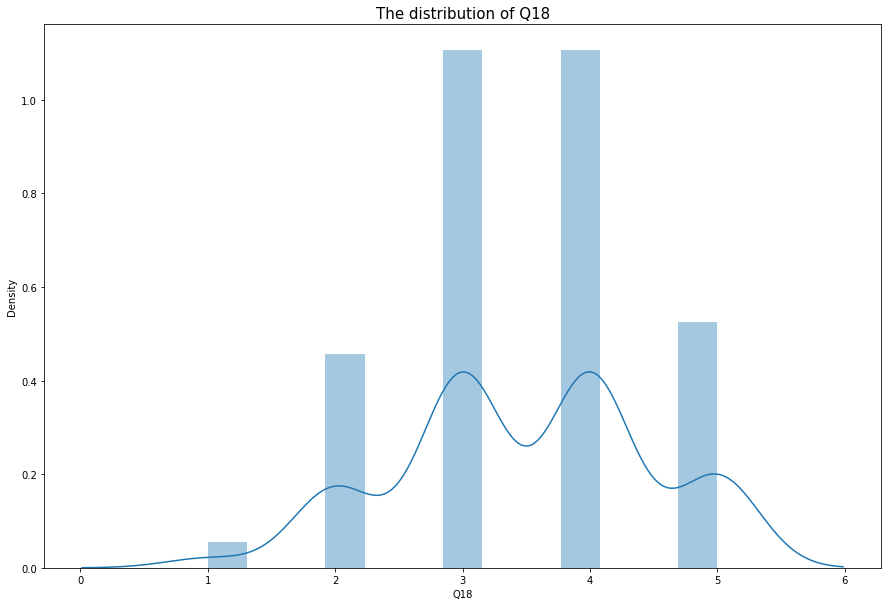

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


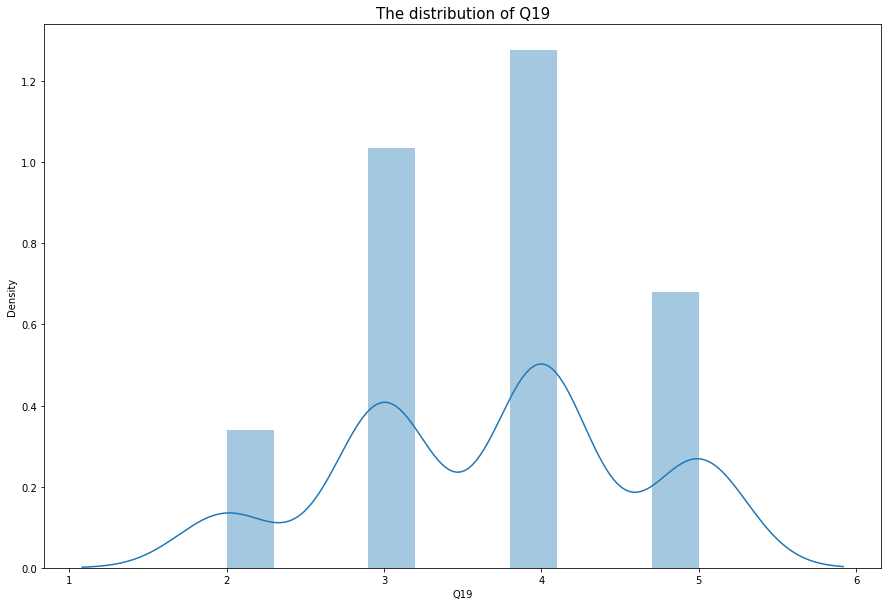

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


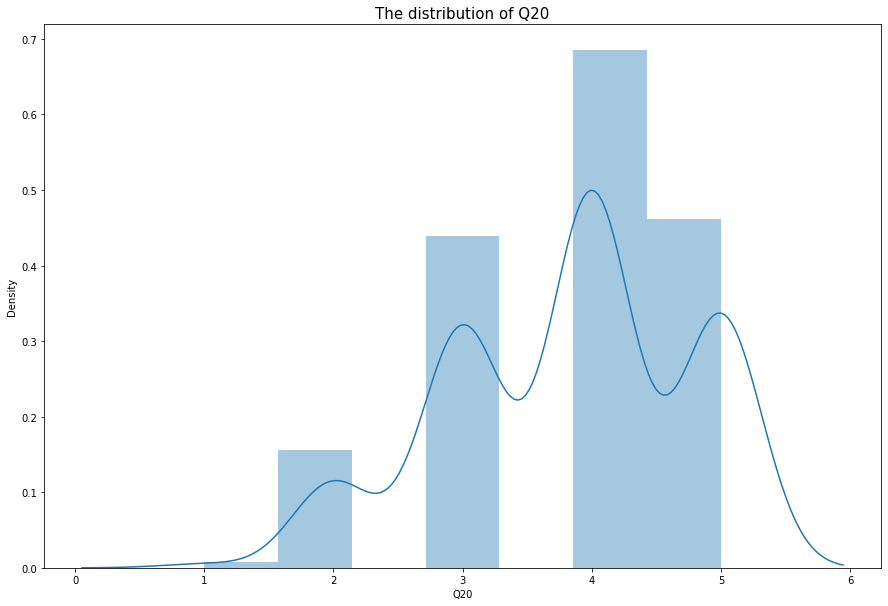

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


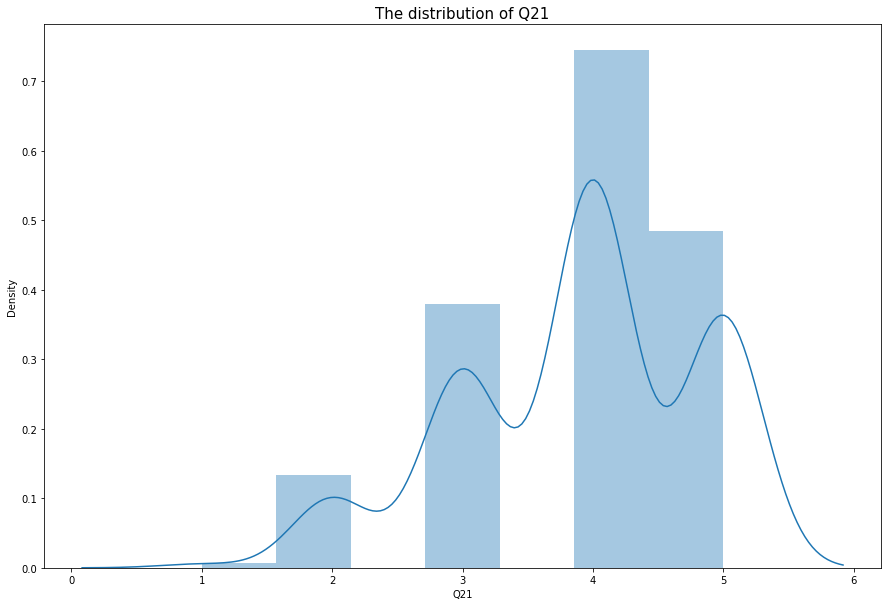

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


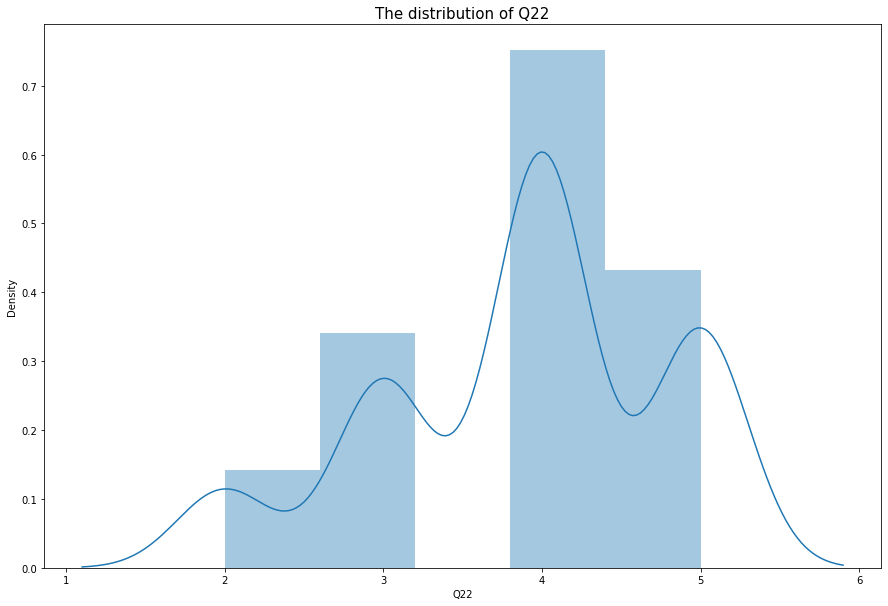

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


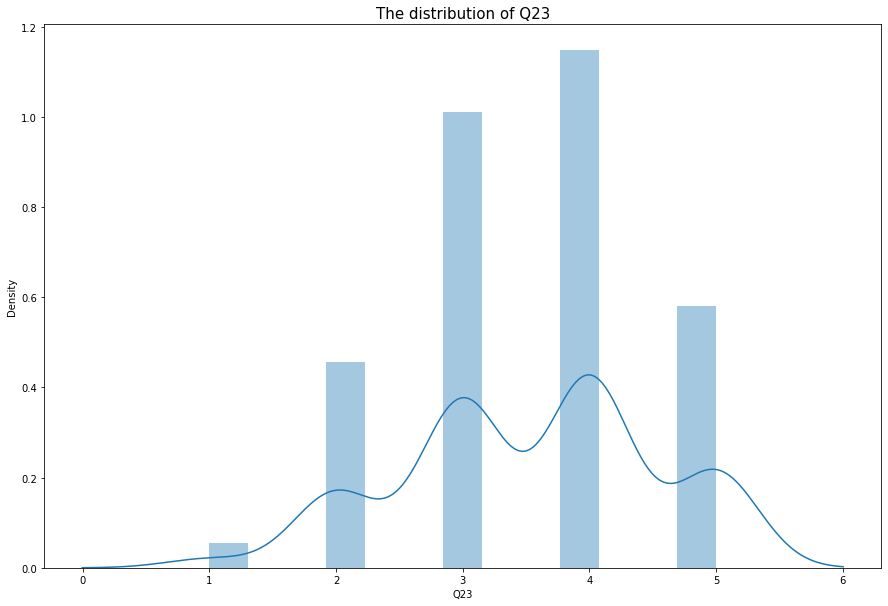

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


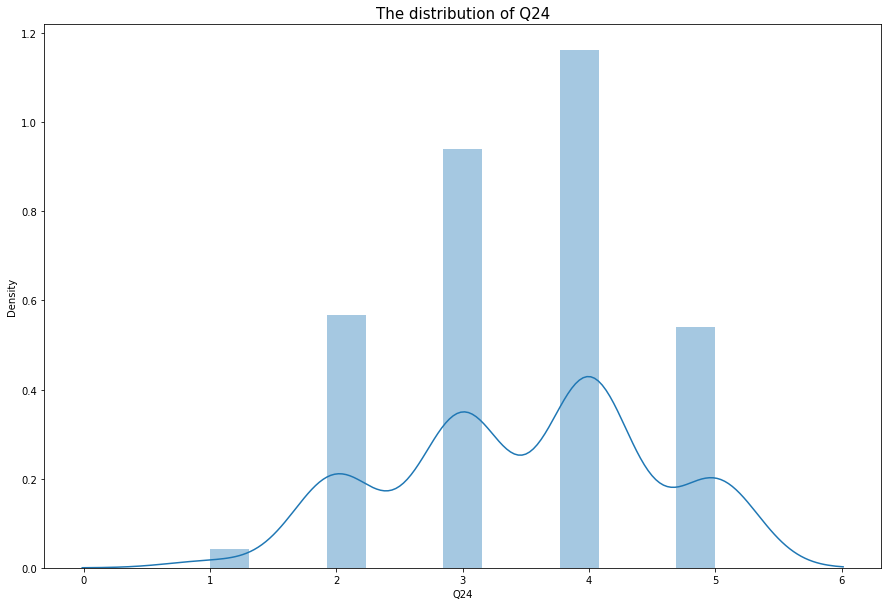

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


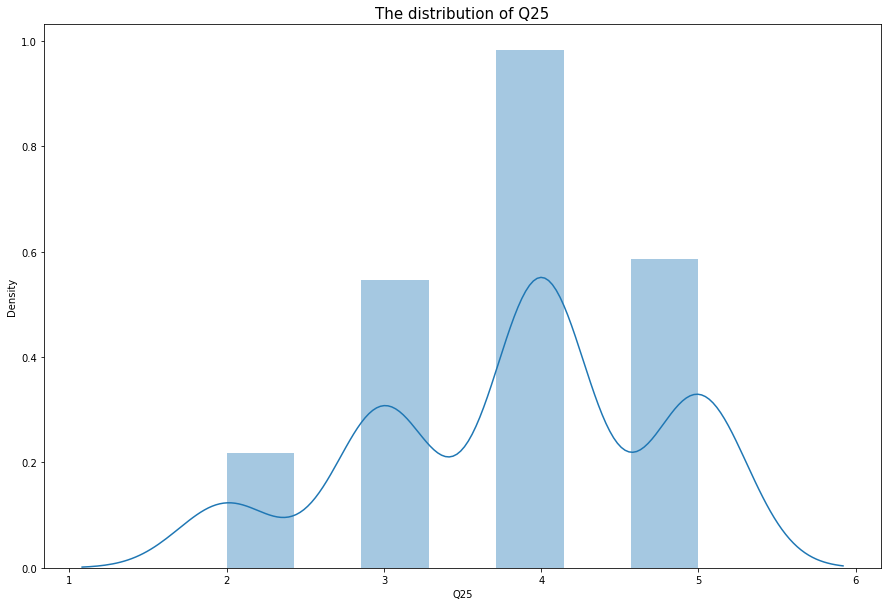

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


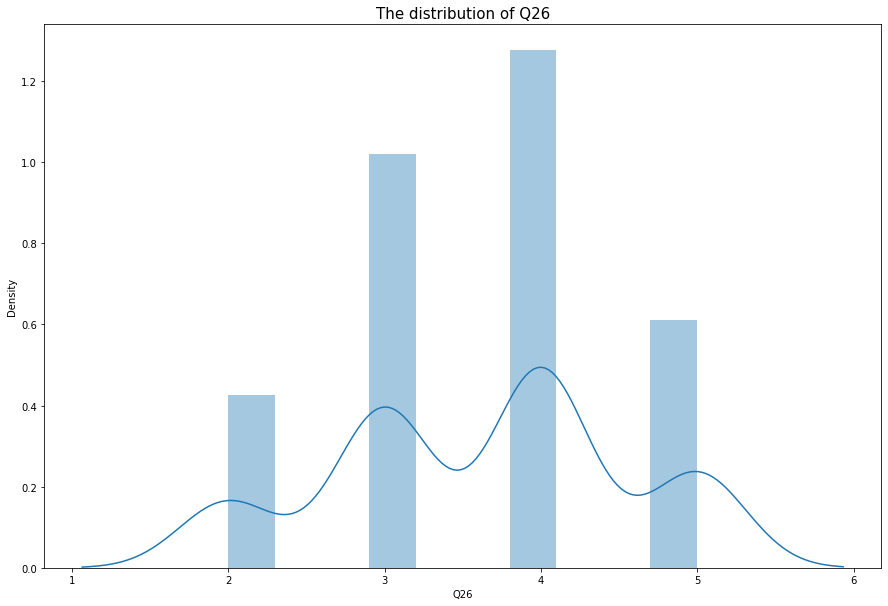

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


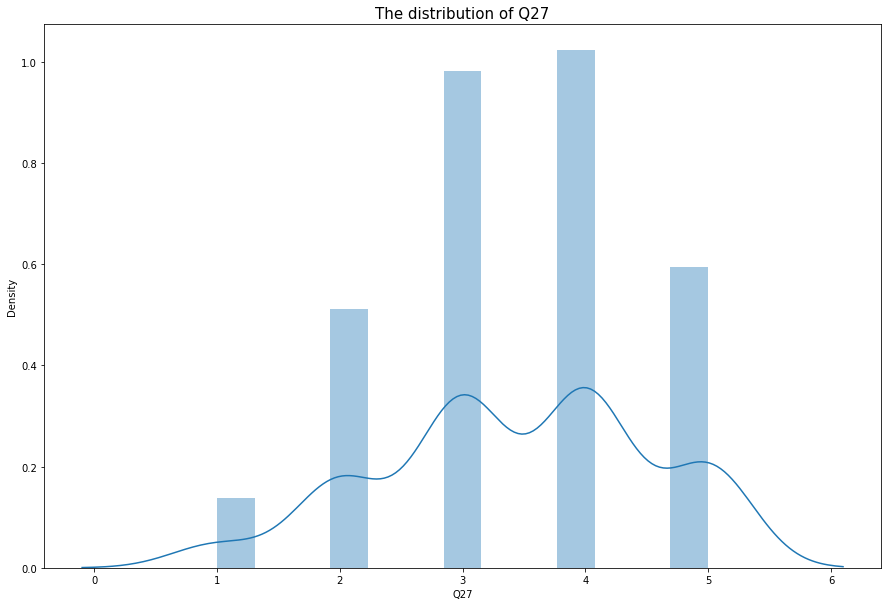

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


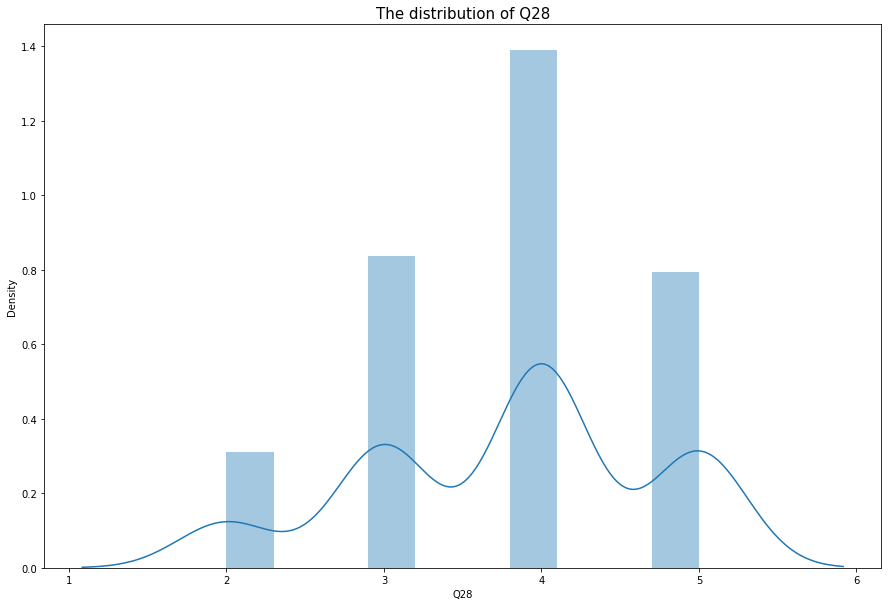

In [ ]:
for col in list(df_copy.columns):
  plt.figure(figsize=(15,10))
  plt.title(f'The distribution of {col}',fontsize=15)
  snus.distplot(df_group_wo_anomaly[col])
  plt.show()

###**Анализ зависимостей (матрицы корреляций, скрытых факторов)**

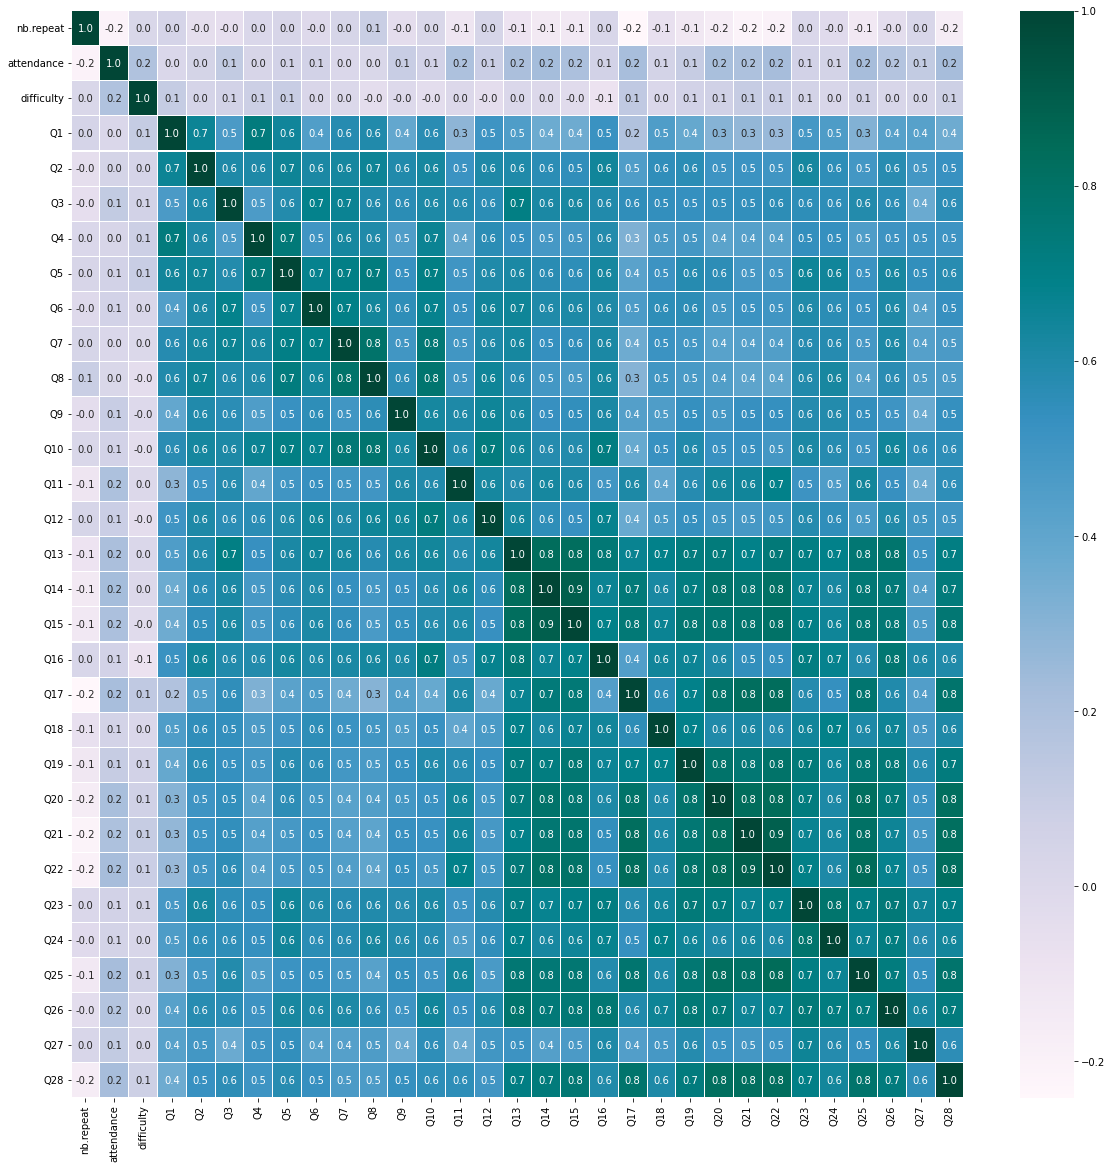

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
snus.heatmap(df_group_wo_anomaly.drop(['class', 'instr'], axis=1).corr(), annot=True, linewidths=.10, fmt= '.1f',ax=ax, cmap='PuBuGn')
plt.show()

Можно заметить, что ответы на вопросы Q14 и Q15, а также Q21 и Q22 сильно коррелированны между собой. 

Исходя из этого, можно сделать выводы, что конкретно для этого класса, такие вопросы, как: 
> Q14: The Instructor came prepared for classes.

> Q15: The Instructor taught in accordance with the announced lesson plan.

сильно похожи, и ответы на них соответствующие. Действительно, формулировки вопросов очень близки. Так же как и вопросы: 


> Q21: The Instructor demonstrated a positive approach to students.

> Q22: The Instructor was open and respectful of the views of students about the course.










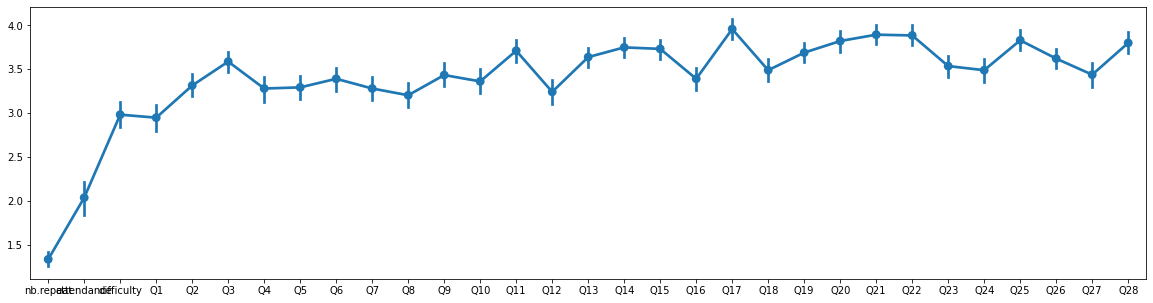

In [ ]:
plt.figure(figsize=(20, 5))
snus.pointplot(data=df_group_wo_anomaly
               .drop(['class', 'instr'], axis=1))

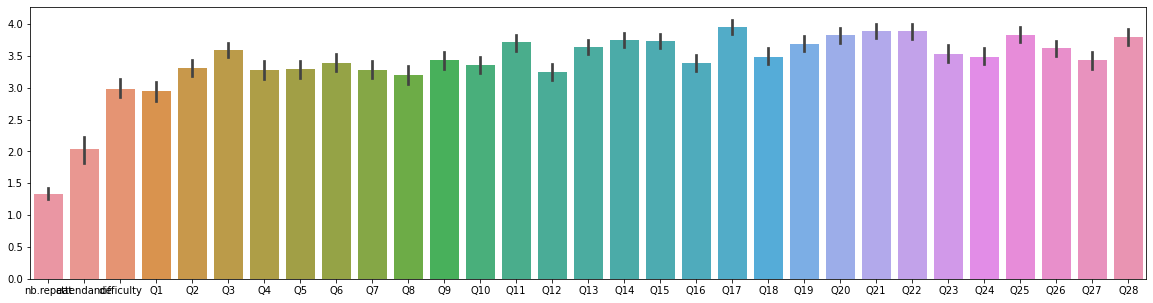

In [ ]:
plt.figure(figsize=(20, 5))
snus.barplot(data=df_group_wo_anomaly
               .drop(['class', 'instr'], axis=1))

#**Анализ по всей выборке объектов того же преподавателя (одинаковый id в столбце instr).**

In [ ]:
df_id = pd.DataFrame(df[df['instr'] == 3])
df_id

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
2220,3,3,1,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2221,3,3,1,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2222,3,3,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2223,3,3,3,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2224,3,3,3,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,3,13,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5817,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5818,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5819,3,13,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


###**Анализируем на выбросы с помощью boxplot.**



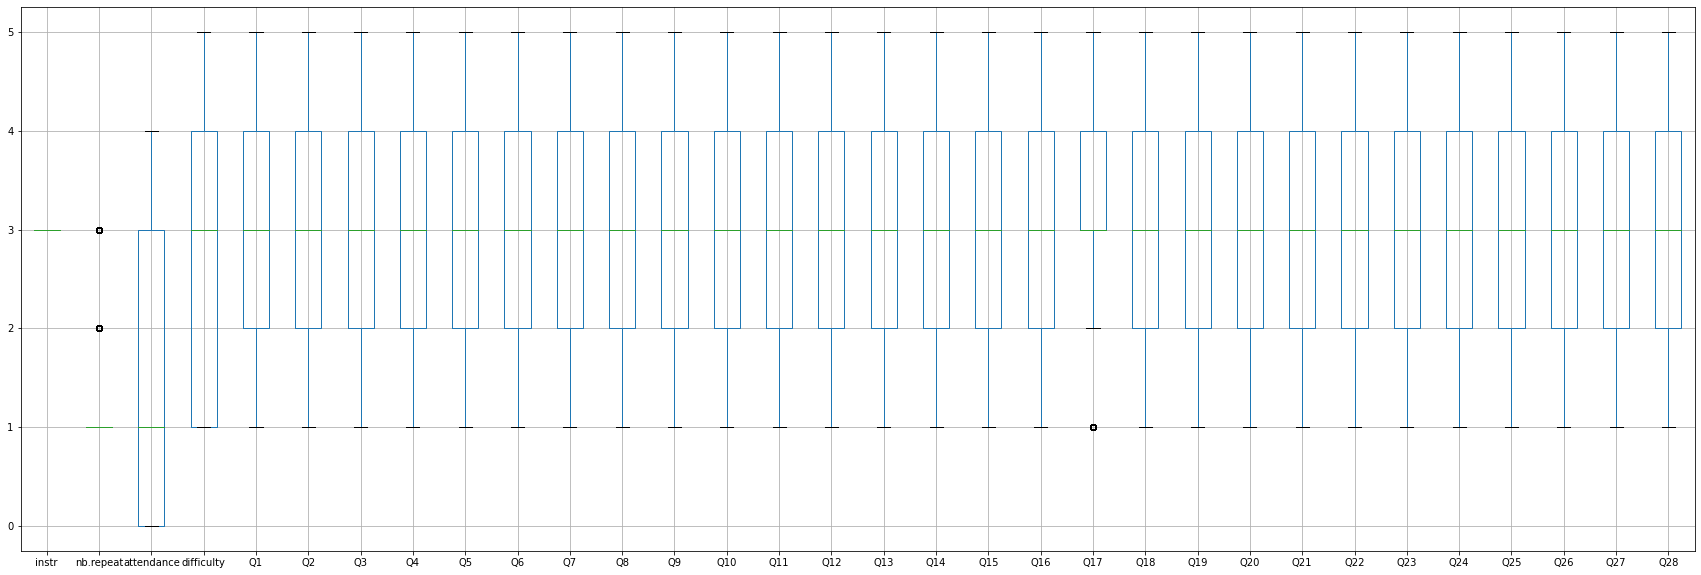

In [ ]:
df_id.drop(['class'], axis=1).boxplot(figsize=(30, 10))

Удаляем их:

In [ ]:
anomaly_columns_list = ['Q17']
df_id_wo_anomaly = df_id.copy()
for col in anomaly_columns_list:
  df_id_wo_anomaly = pd.DataFrame(df_id_wo_anomaly[df_id_wo_anomaly[col] != 1])
df_id_wo_anomaly

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
2220,3,3,1,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2221,3,3,1,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2223,3,3,3,0,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2224,3,3,3,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2225,3,3,1,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,3,13,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5812,3,13,1,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5814,3,13,2,3,4,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5817,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5


Снова воспользуемся методами кластеризации:

In [ ]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(df_id_wo_anomaly)
start_index = df_id_wo_anomaly.index.values.tolist()[0]
df_id_wo_anomaly.drop([ind + start_index  for ind, val in enumerate(clusters) if val == -1 and (ind + start_index) in df_id_wo_anomaly.index], inplace=True)

Так же, если например посещение нулевое, однако человек поставил супер высокие оценки на опросе- можно считать такую оценку неадекватной.

---



In [ ]:
df_id_wo_anomaly.drop([ind for ind, r in df_id_wo_anomaly.iterrows() if r['attendance'].item() == 0 and r.mean(axis=0) >= 4.5 ], inplace=True)

Проверяем пропущенные данные:

In [ ]:
df_id_wo_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 2220 to 5817
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       2055 non-null   int64
 1   class       2055 non-null   int64
 2   nb.repeat   2055 non-null   int64
 3   attendance  2055 non-null   int64
 4   difficulty  2055 non-null   int64
 5   Q1          2055 non-null   int64
 6   Q2          2055 non-null   int64
 7   Q3          2055 non-null   int64
 8   Q4          2055 non-null   int64
 9   Q5          2055 non-null   int64
 10  Q6          2055 non-null   int64
 11  Q7          2055 non-null   int64
 12  Q8          2055 non-null   int64
 13  Q9          2055 non-null   int64
 14  Q10         2055 non-null   int64
 15  Q11         2055 non-null   int64
 16  Q12         2055 non-null   int64
 17  Q13         2055 non-null   int64
 18  Q14         2055 non-null   int64
 19  Q15         2055 non-null   int64
 20  Q16         2055 non-null  

In [ ]:
obs = df_id_wo_anomaly.isnull().sum().sort_values(ascending = False)
percent = round(df_id_wo_anomaly.isnull().sum().sort_values(ascending = False)/len(df_id_wo_anomaly)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

,Number of Observations,Percent
Q28,0,0.0
Q11,0,0.0
class,0,0.0
nb.repeat,0,0.0
attendance,0,0.0
difficulty,0,0.0
Q1,0,0.0
Q2,0,0.0
Q3,0,0.0
Q4,0,0.0


Таковых нетю, уря. Заметим, как сильно поменялось количество данных исходных и после удаления выбросов

In [ ]:
len(df_id)

3601

In [ ]:
len(df_id_wo_anomaly)

2055

###**Анализ на основе описательных статистик.**


In [ ]:
from scipy import stats
for col in list(df_copy.columns):
  # normality test
  stat, p = stats.shapiro(df_id_wo_anomaly[col])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print(f'The column {col} looks Gaussian (fail to reject H0)')
  else:
    print(f'The column {col}  does not look Gaussian (reject H0)')

Statistics=0.915, p=0.000
The column Q1  does not look Gaussian (reject H0)
Statistics=0.915, p=0.000
The column Q2  does not look Gaussian (reject H0)
Statistics=0.908, p=0.000
The column Q3  does not look Gaussian (reject H0)
Statistics=0.914, p=0.000
The column Q4  does not look Gaussian (reject H0)
Statistics=0.913, p=0.000
The column Q5  does not look Gaussian (reject H0)
Statistics=0.910, p=0.000
The column Q6  does not look Gaussian (reject H0)
Statistics=0.915, p=0.000
The column Q7  does not look Gaussian (reject H0)
Statistics=0.915, p=0.000
The column Q8  does not look Gaussian (reject H0)
Statistics=0.909, p=0.000
The column Q9  does not look Gaussian (reject H0)
Statistics=0.912, p=0.000
The column Q10  does not look Gaussian (reject H0)
Statistics=0.911, p=0.000
The column Q11  does not look Gaussian (reject H0)
Statistics=0.914, p=0.000
The column Q12  does not look Gaussian (reject H0)
Statistics=0.904, p=0.000
The column Q13  does not look Gaussian (reject H0)
Statisti

Следовательно, следует принять гипотезы о том, что данные в опросе не распределены нормально.

Построим графики, показывающие это:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


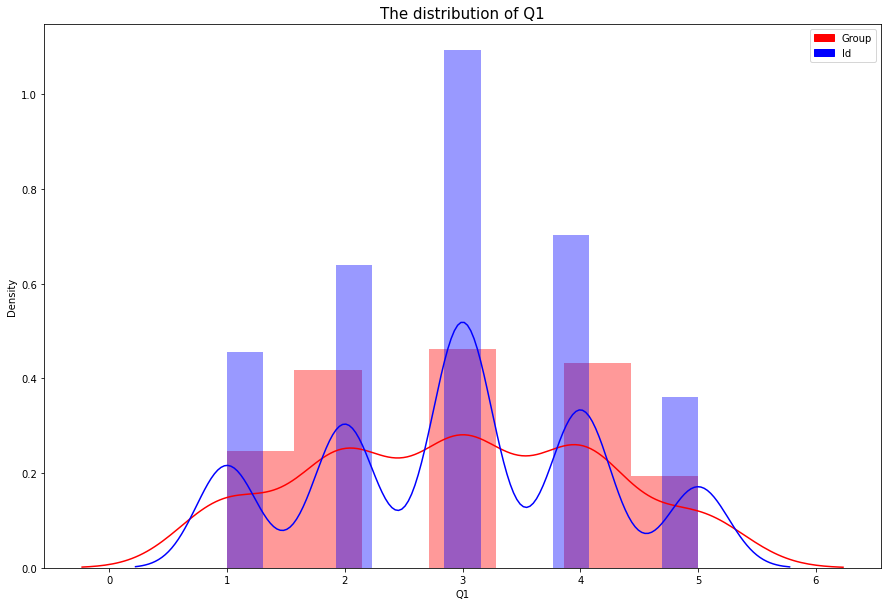

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


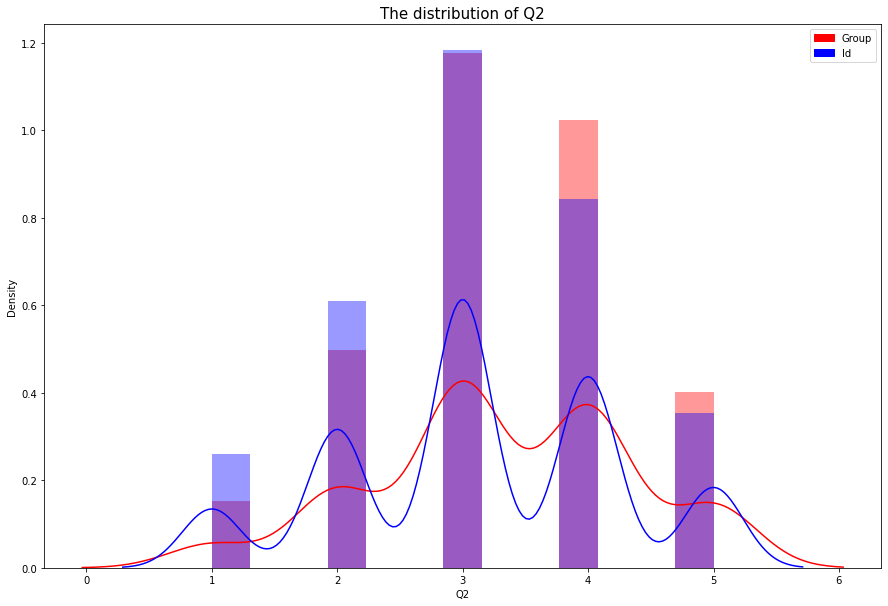

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


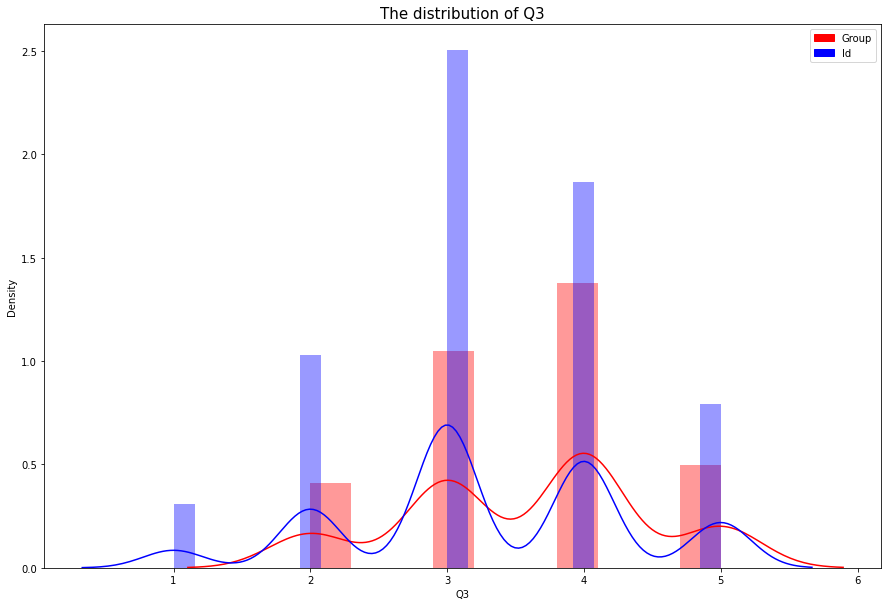

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


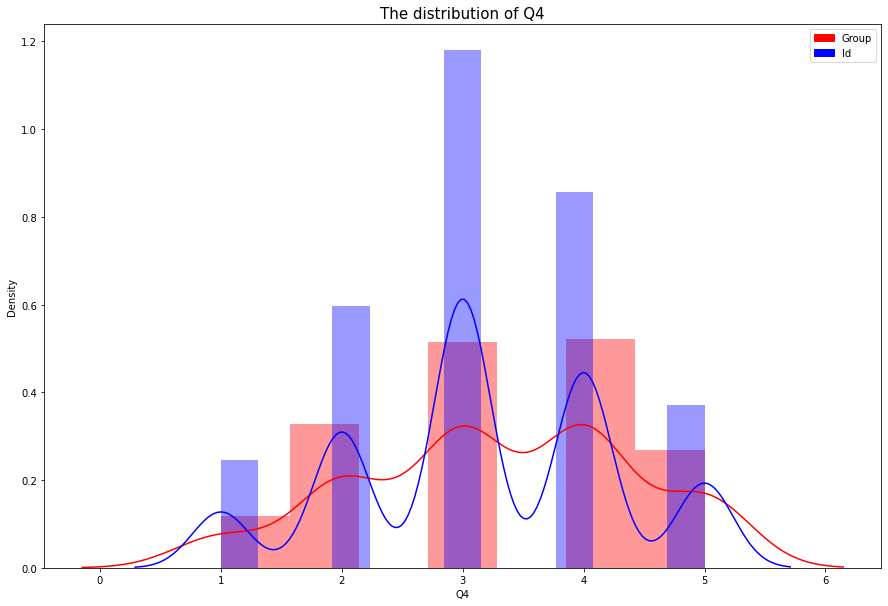

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


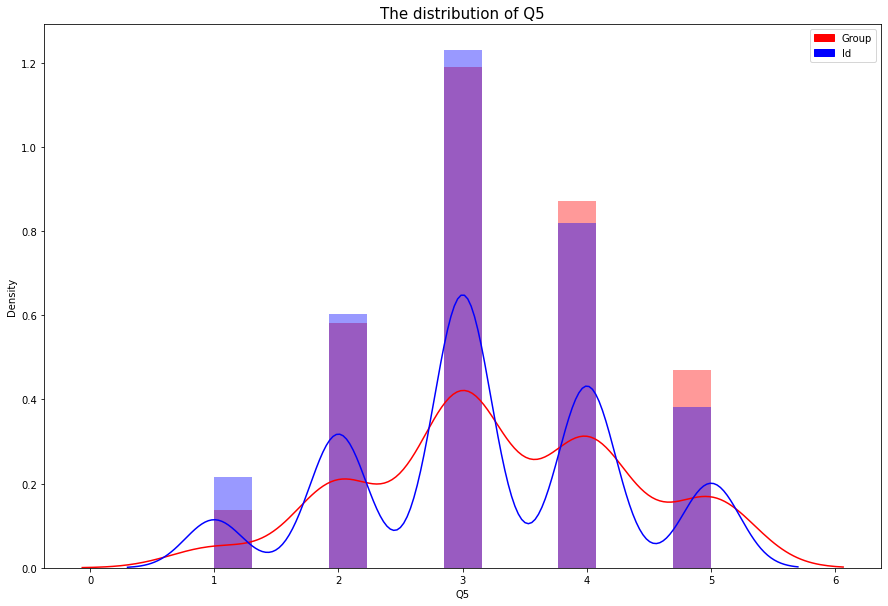

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


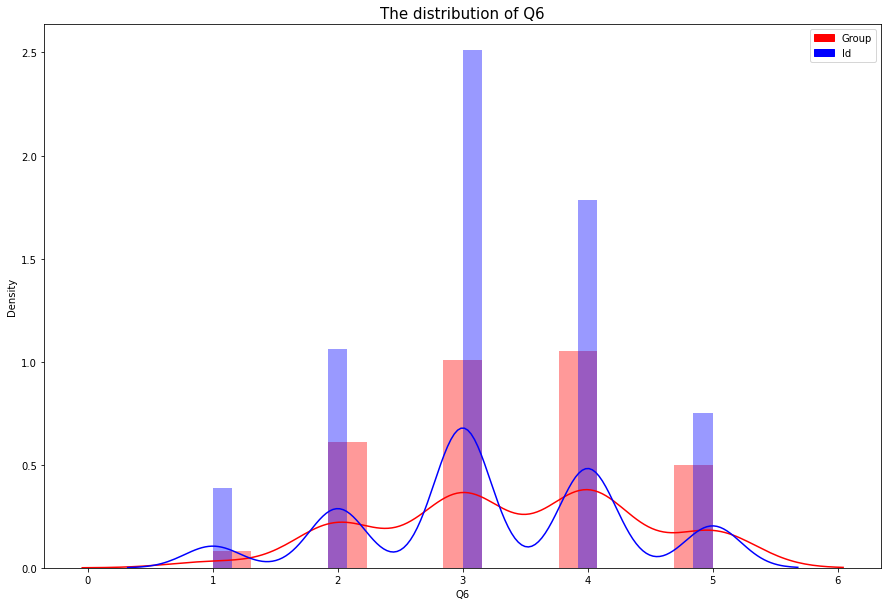

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


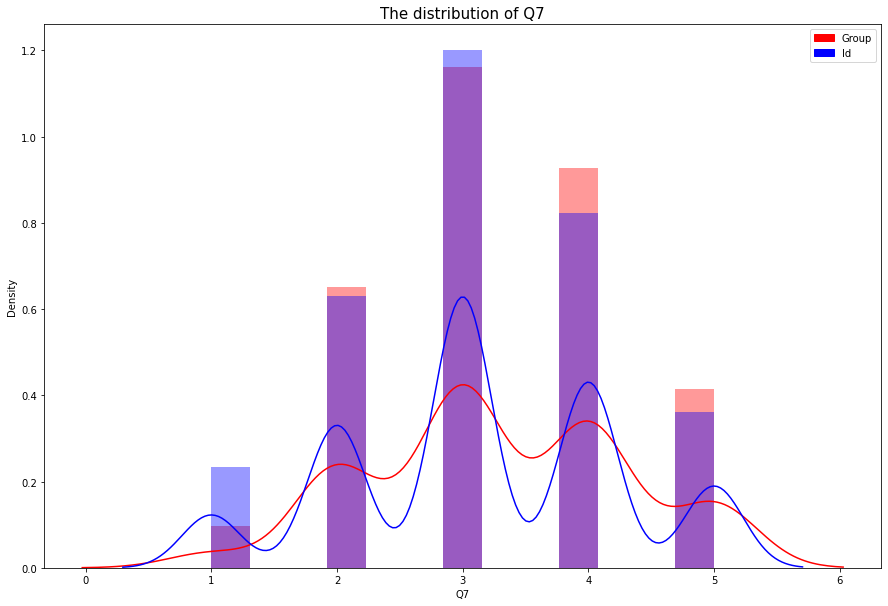

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


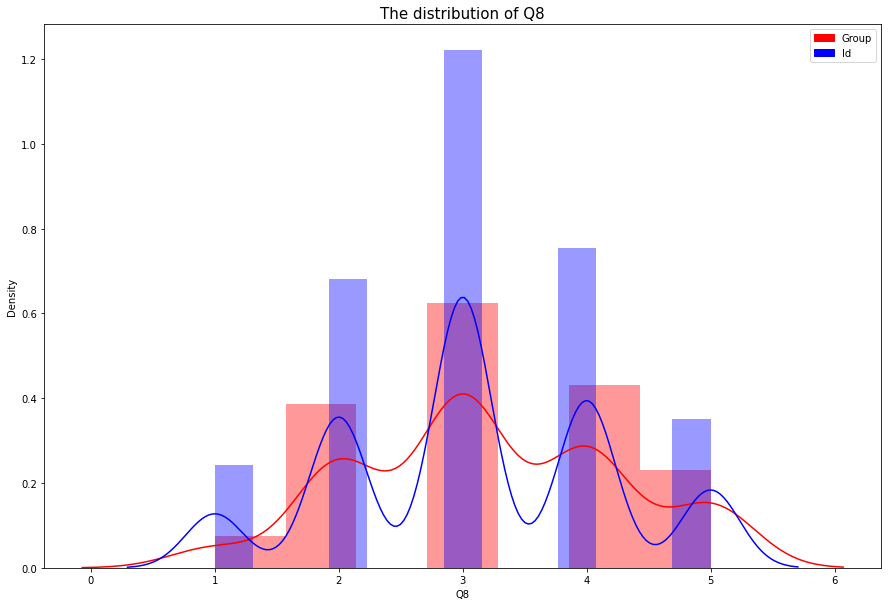

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


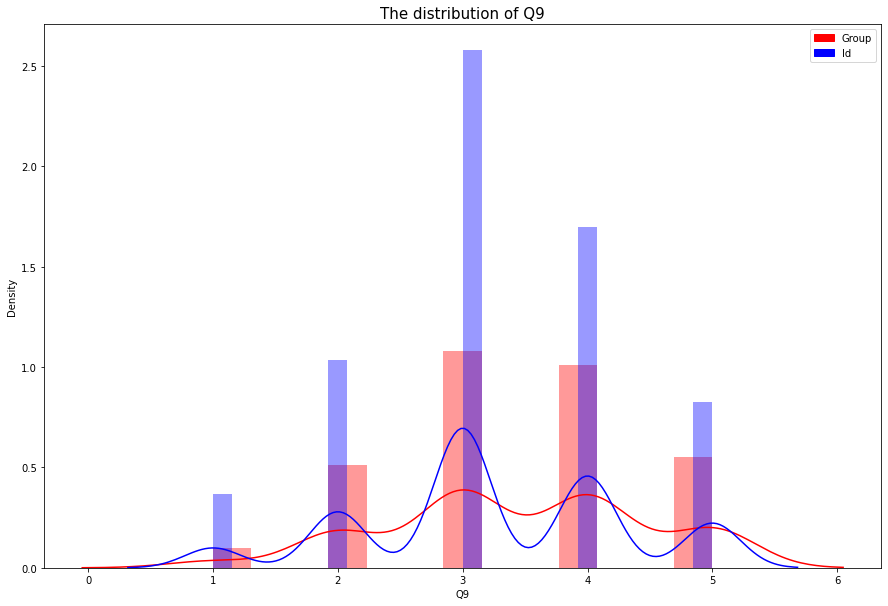

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


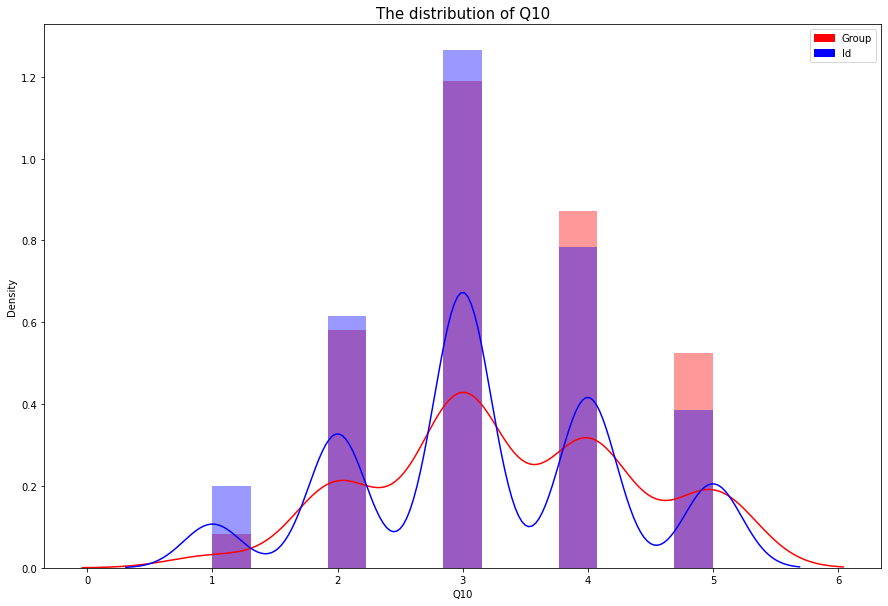

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


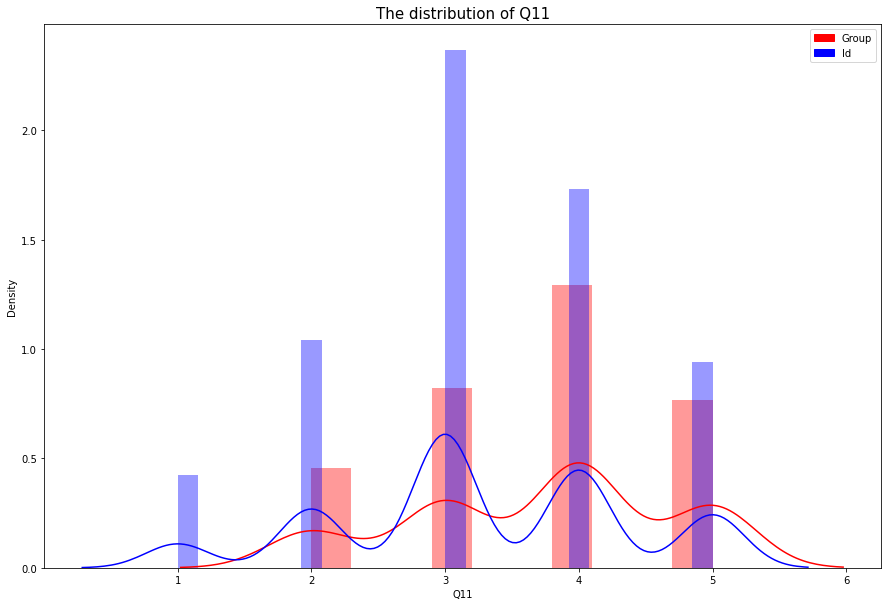

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


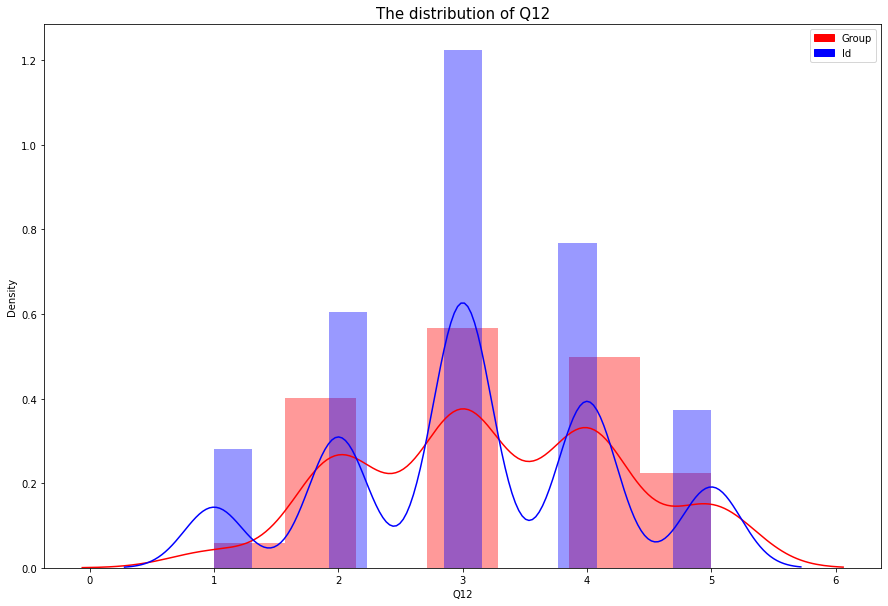

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


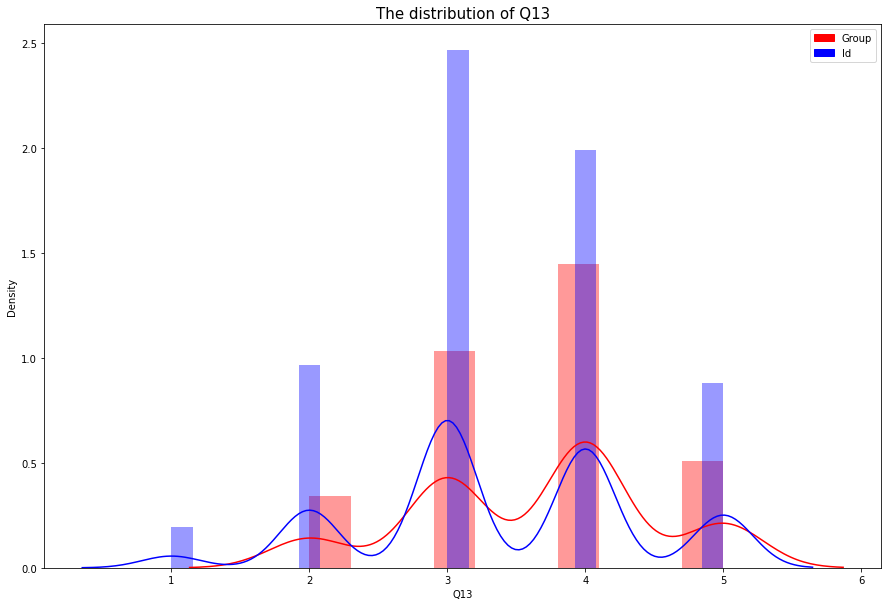

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


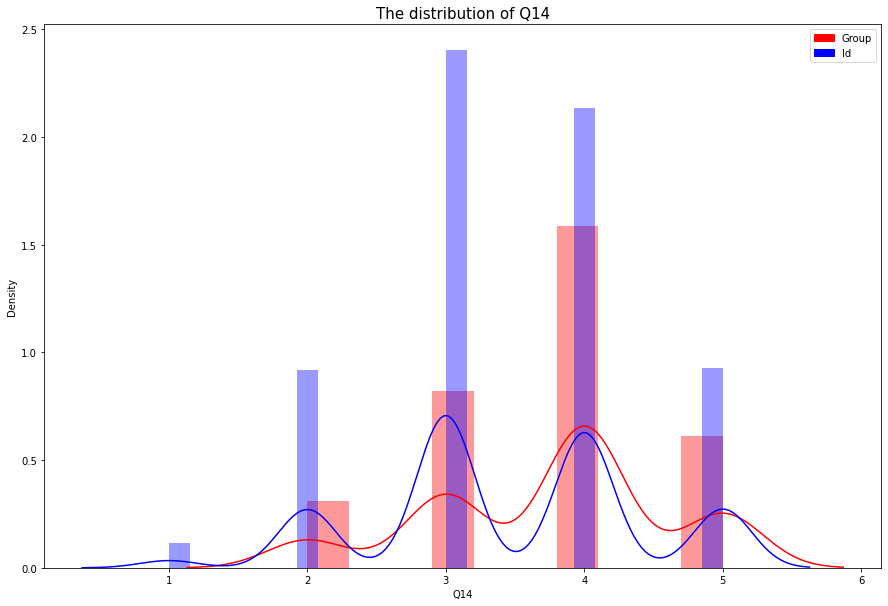

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


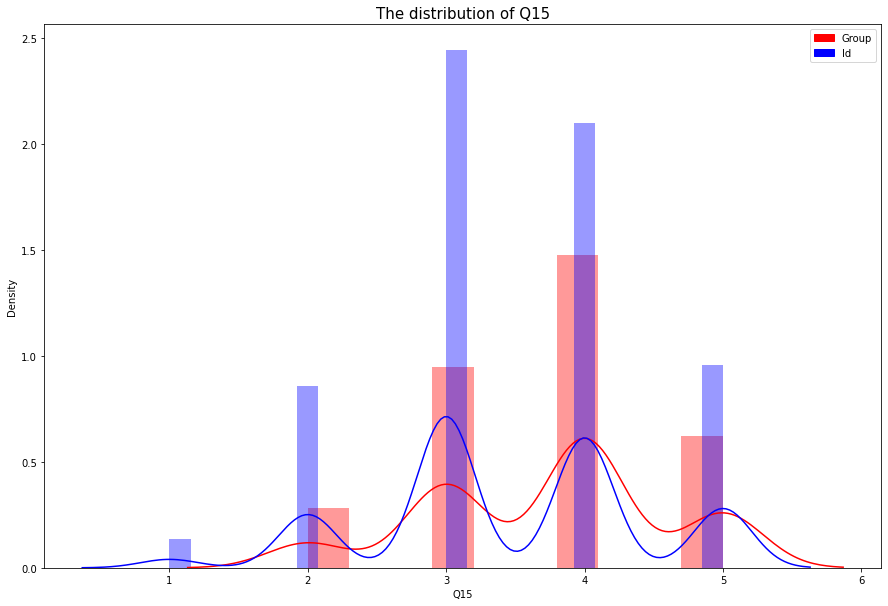

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


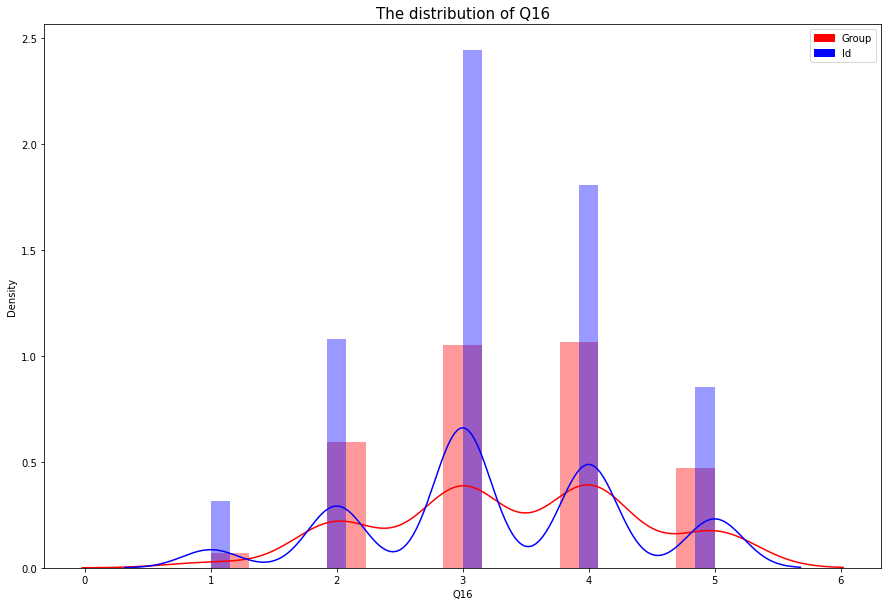

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


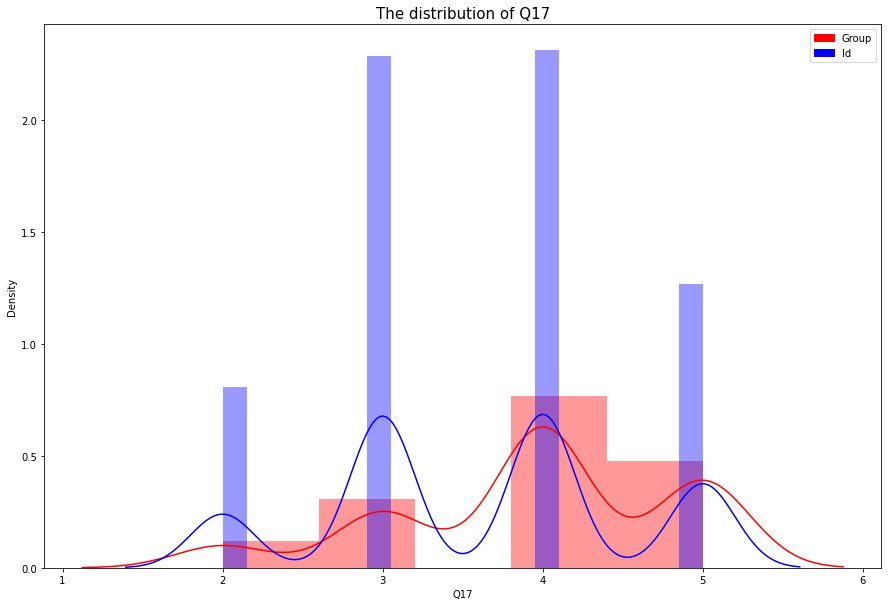

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


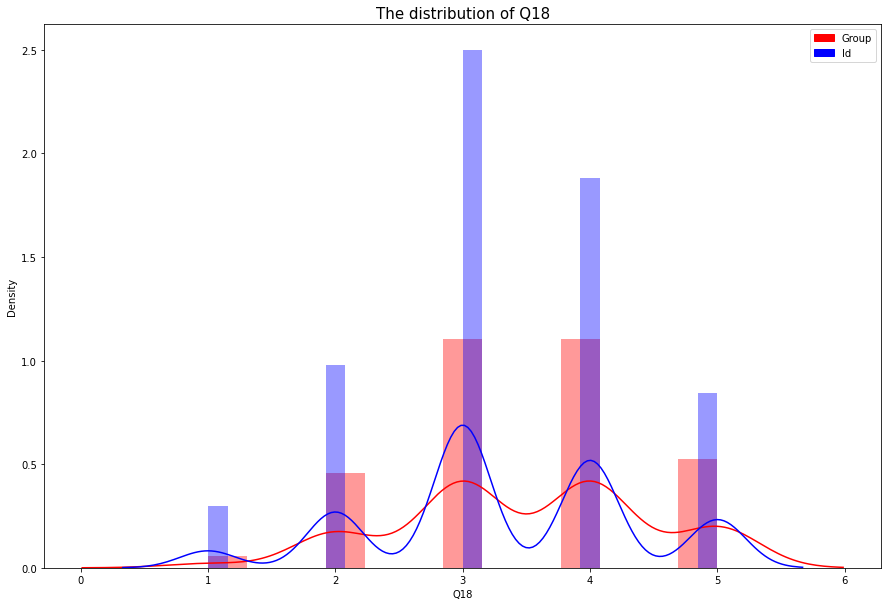

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


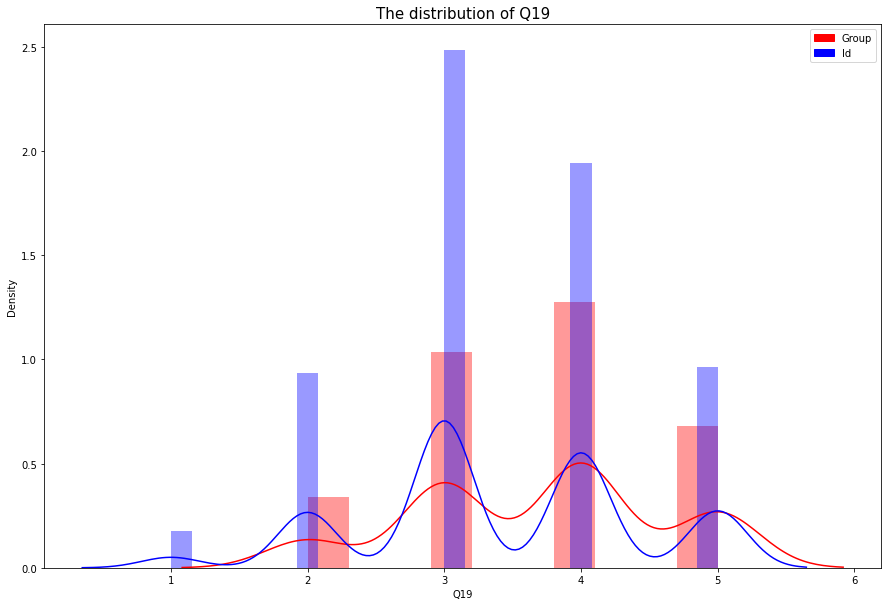

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


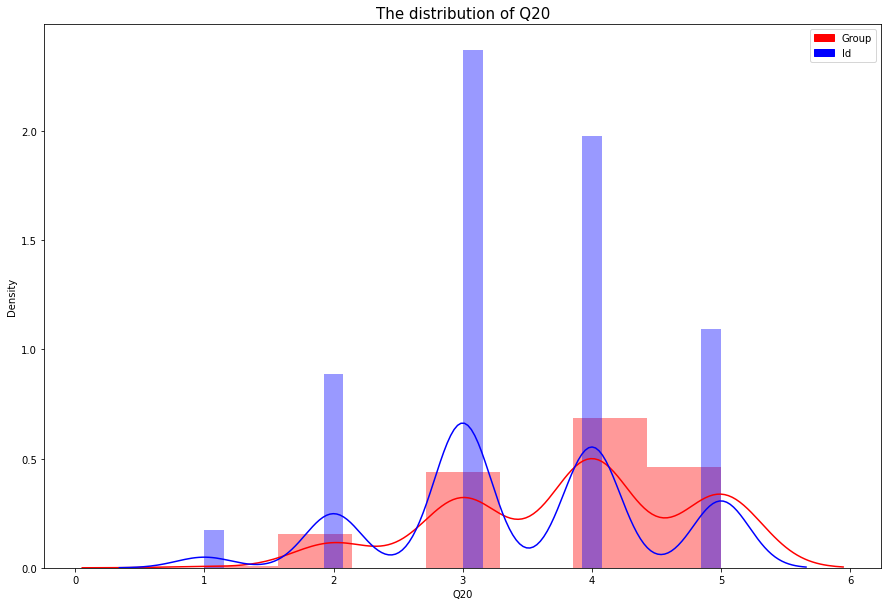

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


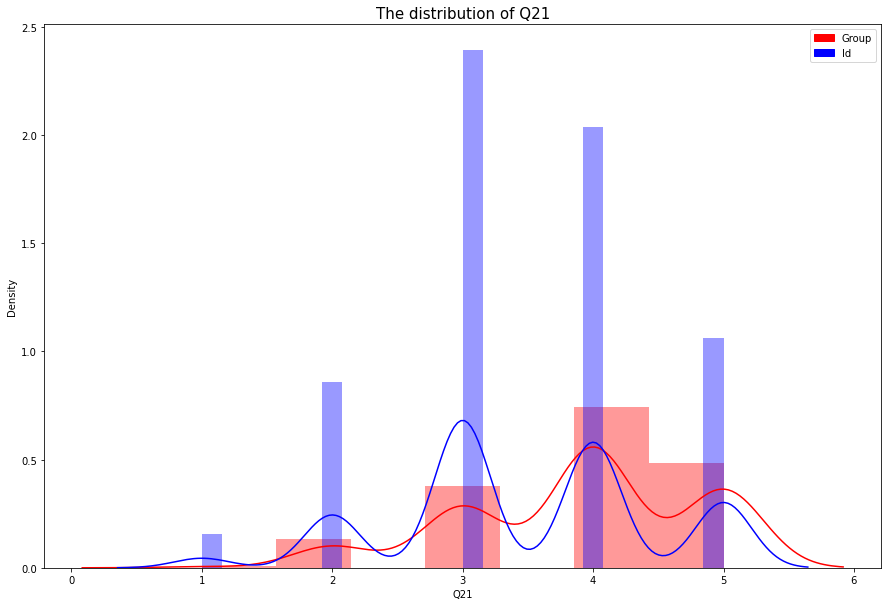

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


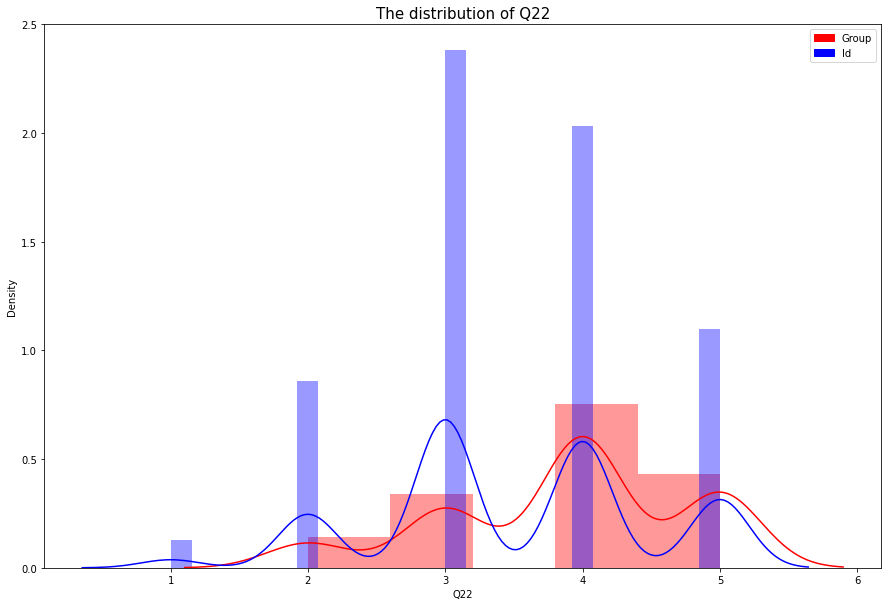

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


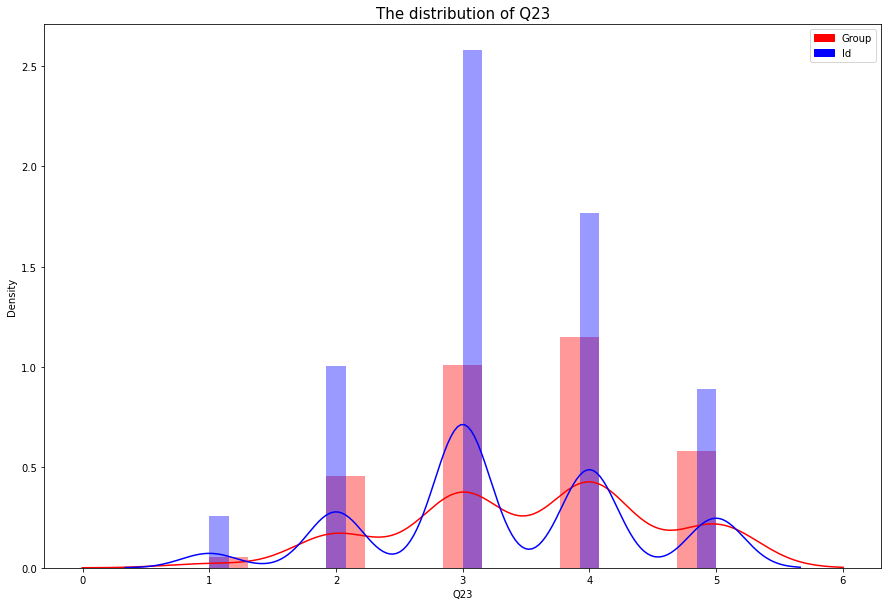

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


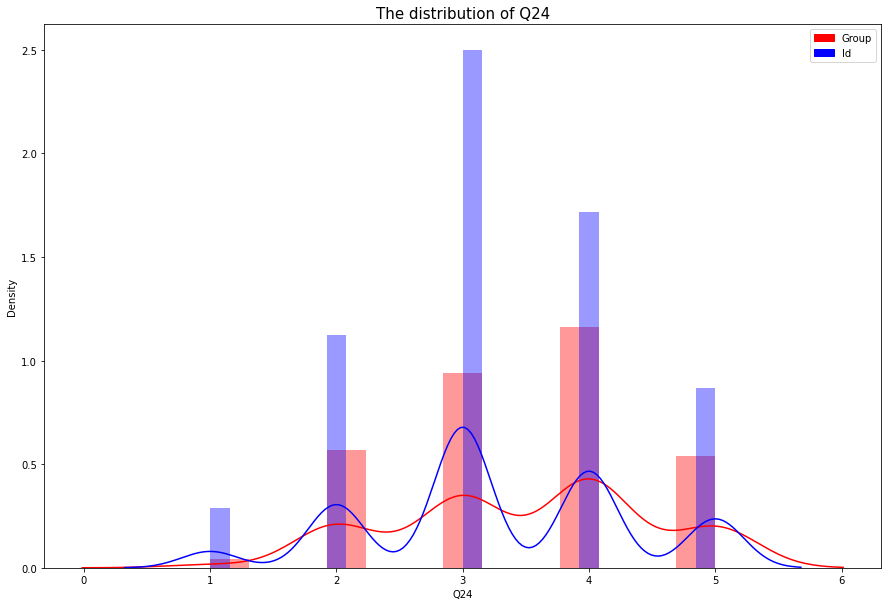

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


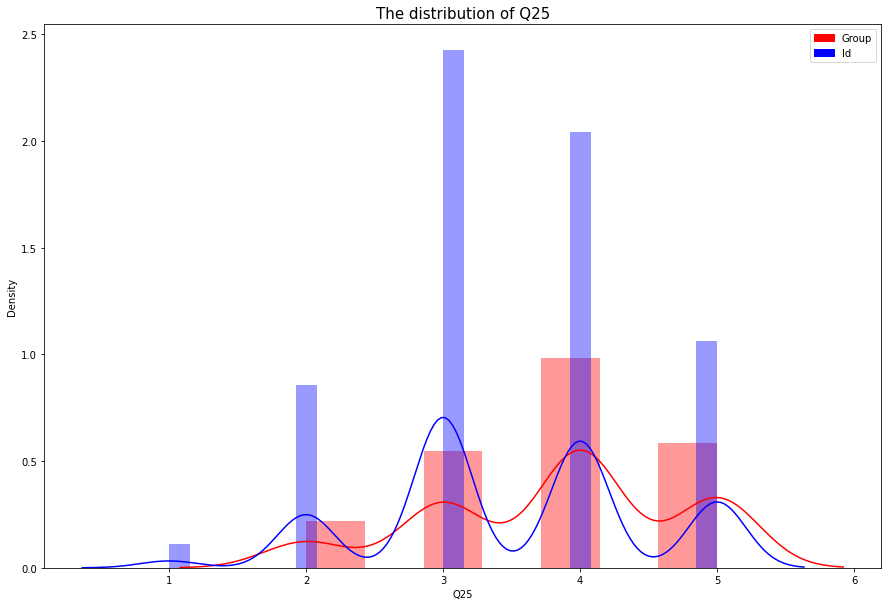

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


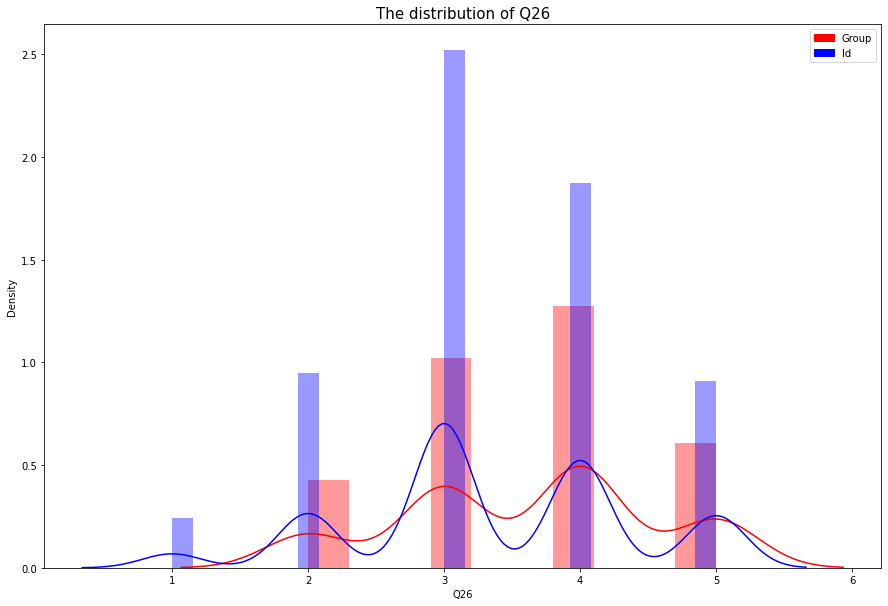

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


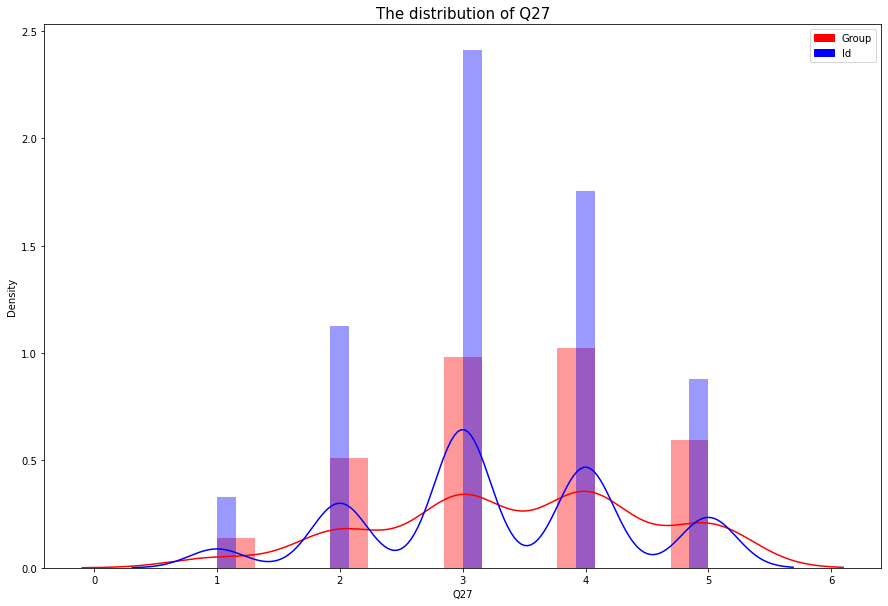

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


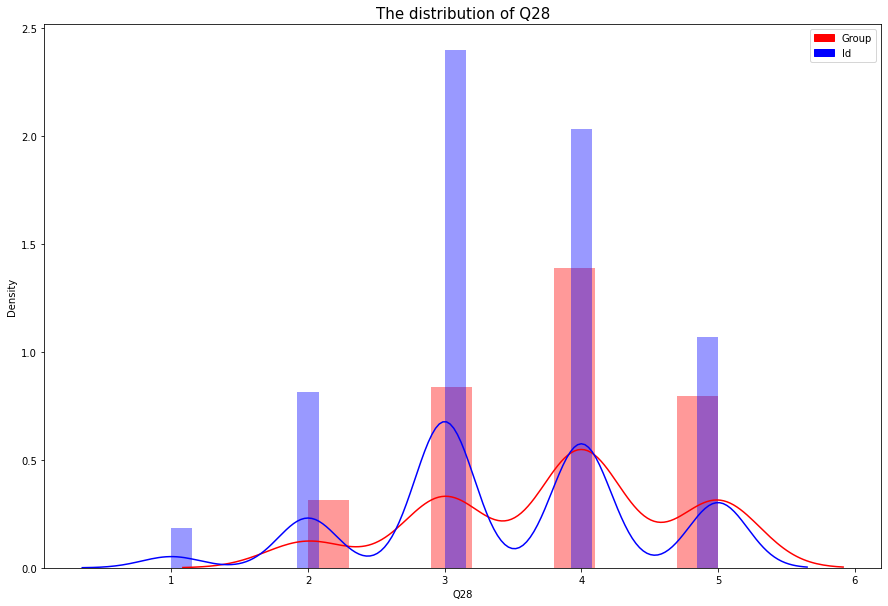

In [ ]:
import matplotlib.patches as mpatches
for col in list(df_copy.columns):
  plt.figure(figsize=(15,10))
  plt.title(f'The distribution of {col}',fontsize=15)
  snus.distplot(df_group_wo_anomaly[col], color='red')
  snus.distplot(df_id_wo_anomaly[col], color='blue')
  red_patch = mpatches.Patch(color='red', label='Group')
  black_patch = mpatches.Patch(color='blue', label='Id')
  plt.legend(handles=[red_patch, black_patch])
  plt.show()

Как можно заметить, плотность распределения данных, собранных только в одной группе и данных, собранных из разных групп - сильно различаются не только количеством, но и смещением, потому что в случае с рассматриваемой группы в некоторых столбцах можно заметить, что отметка 4 появляется значительно чаще остальных, в то время как на выборке по id больше всего примеров встречается с оценкой 3 (что является медианой).

###**Анализ зависимостей (матрицы корреляций, скрытых факторов)**

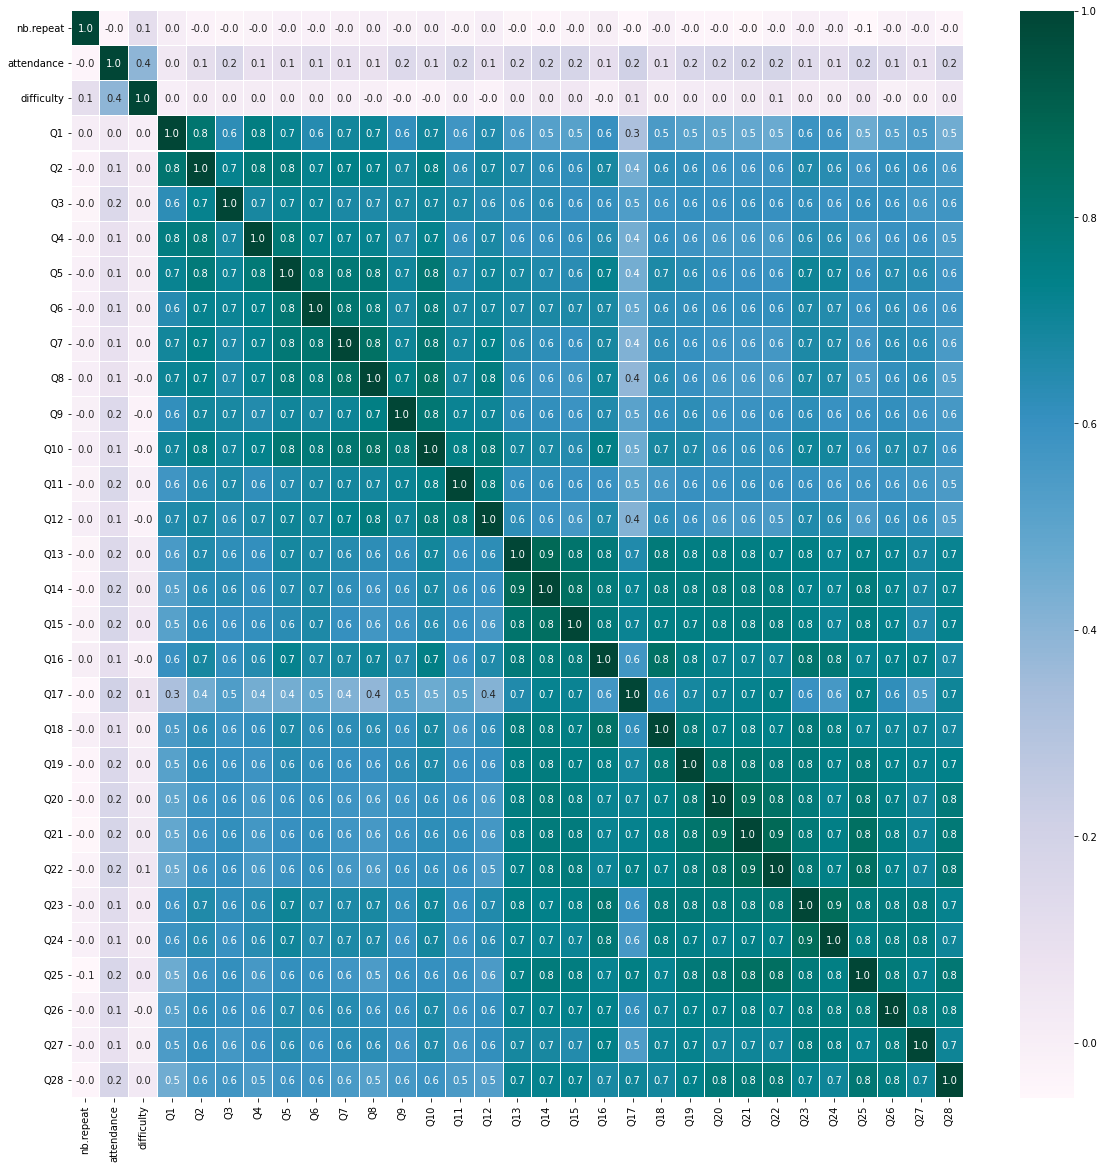

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
snus.heatmap(df_id_wo_anomaly.drop(['class', 'instr'], axis=1).corr(), annot=True, linewidths=.10, fmt= '.1f',ax=ax, cmap='PuBuGn')
plt.show()

Можно заметить, что выявилась более сильная корреляция признаков, нежели это было выявлено в корреляции по выборке Group. Например, более явно стала выделяться корреляция по признакам Q20 и Q21, а также появилось значительно больше значений больше 0.8.

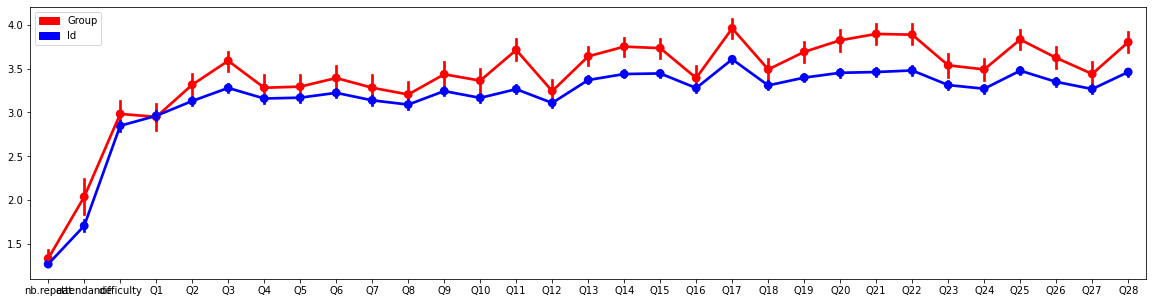

In [ ]:
plt.figure(figsize=(20, 5))
snus.pointplot(data=df_group_wo_anomaly
               .drop(['class', 'instr'], axis=1), color = 'red')
snus.pointplot(data=df_id_wo_anomaly
               .drop(['class', 'instr'], axis=1), color = 'blue')
red_patch = mpatches.Patch(color='red', label='Group')
black_patch = mpatches.Patch(color='blue', label='Id')
plt.legend(handles=[red_patch, black_patch])
plt.show()

Очевидно, что чем больше примеров - тем более гладкая функция получается, что и видно на графике выше. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


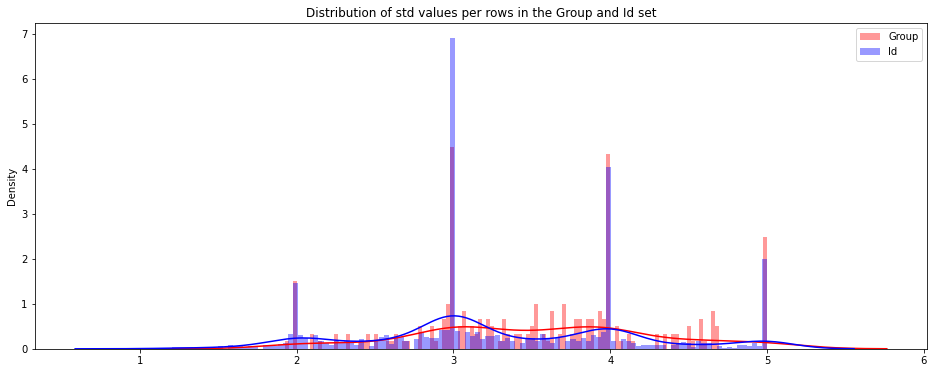

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per rows in the Group and Id set")
snus.distplot(df_group_wo_anomaly[df_copy.columns].mean(axis=1),color="red",kde=True,bins=120, label='Group')
snus.distplot(df_id_wo_anomaly[df_copy.columns].mean(axis=1),color="blue", kde=True,bins=120, label='Id')
plt.legend(); plt.show()


#**PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df_group_scaled = scale(df_group)

In [ ]:
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_group_scaled)
np.round(pca.explained_variance_ratio_*100, 2)

array([63.16,  7.23,  4.07,  3.01])

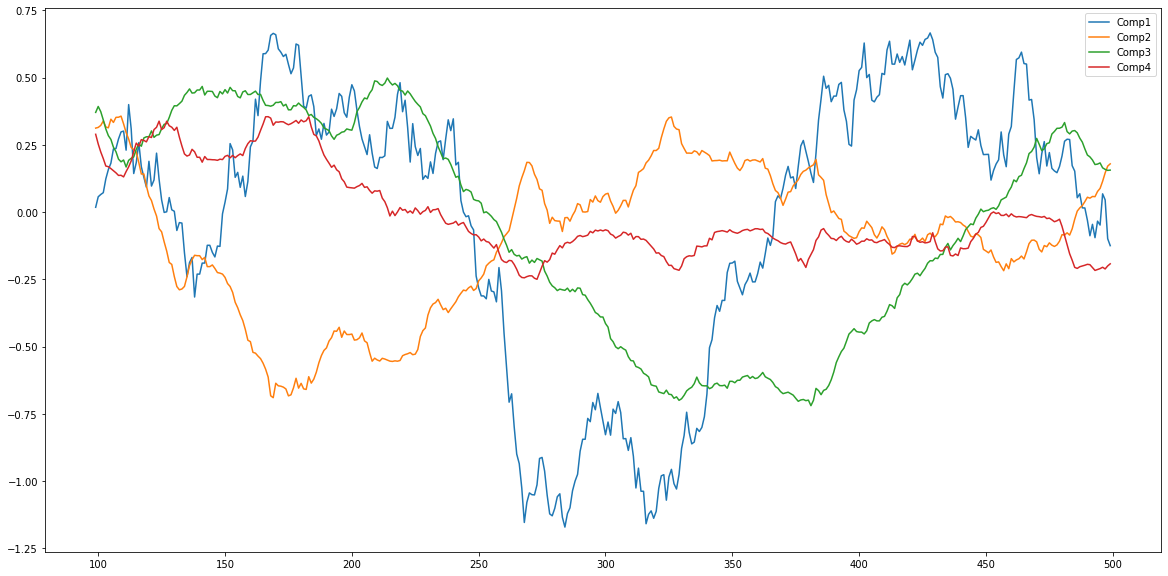

In [ ]:
data_pca = pd.DataFrame(df_pca, columns=['Comp1', 'Comp2', 'Comp3', 'Comp4'])
data_pca.rolling(window=100).mean().plot(figsize=(20, 10))

Необходимо найти оптимальное количество компонент, чтобы уменьшение размерности никак не сказалось на качестве модели, а именно, нам необходимо максимизировать дисперсию. Найдем такое количество компонент:

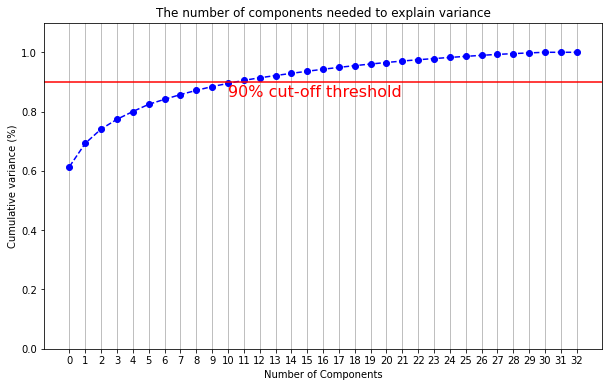

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
data_rescaled = scaler.fit_transform(df_group) 
pca = PCA().fit(data_rescaled) 
  
  
% matplotlib inline 
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (10,6) 
  
fig, ax = plt.subplots() 
xi = np.arange(0, 33, step=1) 
y = np.cumsum(pca.explained_variance_ratio_) 
  
plt.ylim(0.0,1.1) 
plt.plot(xi, y, marker='o', linestyle='--', color='b') 
  
plt.xlabel('Number of Components') 
plt.xticks(np.arange(0, 33, step=1)) #change from 0-based array index to 1-based human-readable label 
plt.ylabel('Cumulative variance (%)') 
plt.title('The number of components needed to explain variance') 
  
plt.axhline(y=0.90, color='r', linestyle='-') 
plt.text(10.0, 0.85, '90% cut-off threshold', color = 'red', fontsize=16) 
  
ax.grid(axis='x') 
plt.show()

чтобы дисперсия была больше 90% - нам необходимо 10 компонент

In [ ]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_group_scaled)
np.round(pca.explained_variance_ratio_*100, 2)

array([63.16,  7.23,  4.07,  3.01,  2.47,  2.14,  1.71,  1.54,  1.46,
        1.32])

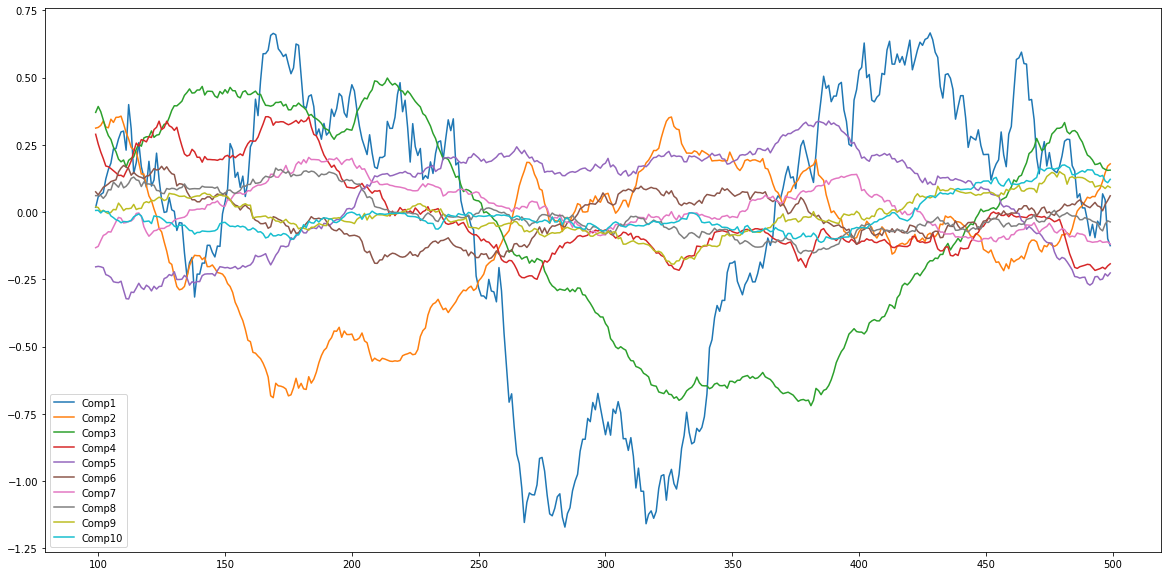

In [ ]:
data_pca = pd.DataFrame(df_pca, columns=['Comp1', 'Comp2', 'Comp3', 'Comp4','Comp5', 'Comp6', 'Comp7', 'Comp8','Comp9', 'Comp10'])
data_pca.rolling(window=100).mean().plot(figsize=(20, 10))

Построим график:



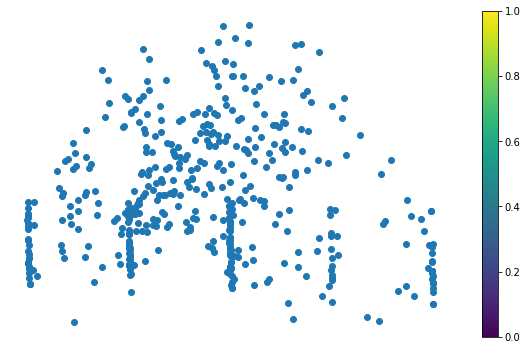

In [ ]:
scaler = StandardScaler()
figsize=(20, 10)
train_scaled = scaler.fit_transform(df_group)         
data_pca = PCA(10).fit_transform(train_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
data_pca

array([[-6.9358419 , -1.75214755, -0.78801041, ..., -0.3943684 ,
        -0.36800117, -0.22833655],
       [-0.59008112,  1.08765538, -0.04465505, ..., -0.06389306,
         0.23445343, -0.03787236],
       [ 4.02515943,  0.67776744,  2.06138728, ..., -0.2829089 ,
         0.4923917 ,  0.22346108],
       ...,
       [-1.66380533,  1.92383401, -0.55620995, ...,  0.84369631,
        -0.15970548,  0.45221578],
       [-4.64454014,  0.88702162,  0.99902595, ...,  0.21936415,
         0.13092549,  0.18362631],
       [ 0.76100632,  1.41723946, -0.37525645, ..., -0.81119874,
         0.09906502,  0.08115976]])

#**TSNE**

 t-SNE это t-distributed stochastic neighbor embedding [Habr.ru](https://habr.com/ru/post/267041/)

In [ ]:
tsne = TSNE(n_components=2 ,perplexity=10)
Z = tsne.fit_transform(data_pca)

Z.shape

(500, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


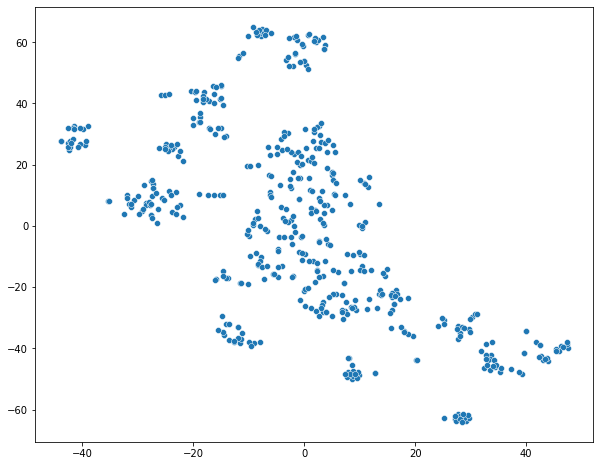

In [ ]:
plt.figure(figsize=(10, 8))
snus.scatterplot(Z[:, 0], Z[:, 1], )
plt.show()

Сложно сказать, можно ли выделить здесь какие либо подгруппы.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


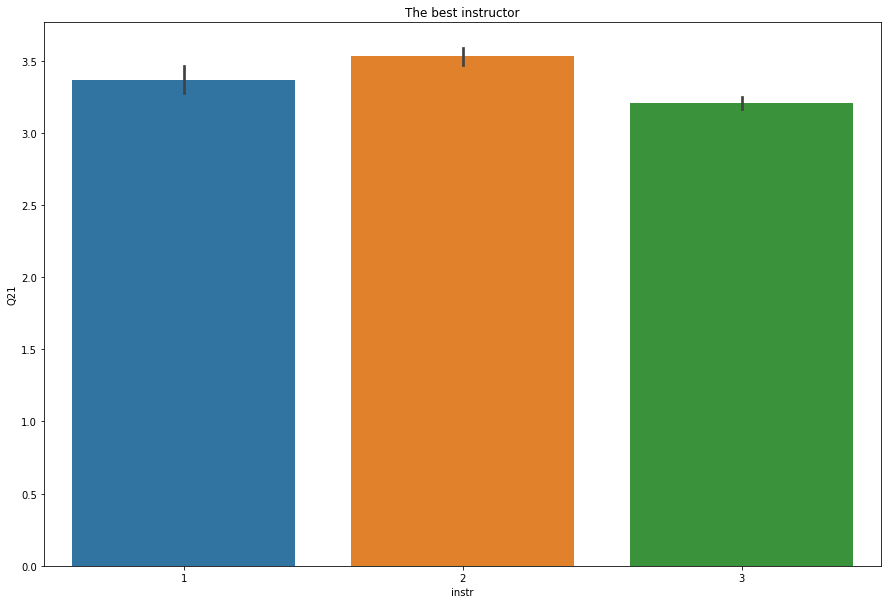

In [ ]:
ydata = df['Q21']
xdata = df['instr']
plt.figure(figsize=(15, 10))
snus.barplot(xdata, ydata)
plt.title('The best instructor')
plt.show()

Можно сказать, что инструктор номер имел наиболее позитивный подход

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


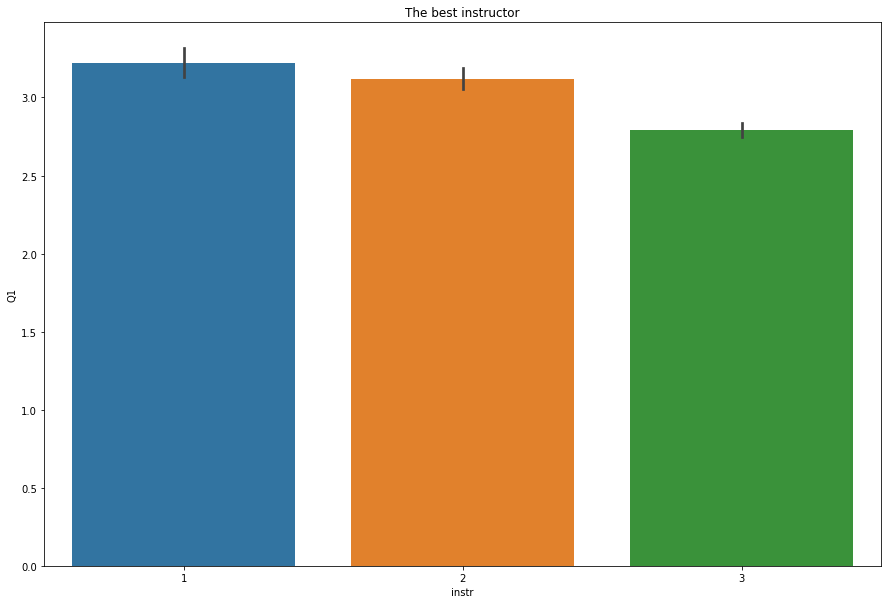

In [ ]:
ydata = df['Q1']
xdata = df['instr']
plt.figure(figsize=(15, 10))
snus.barplot(xdata, ydata)
plt.title('The best instructor')
plt.show()

При этом именно первый инструктор более четко формулировал задачу в самом начале, т.е. у него были более ясные требования

###Найдем лучшего инструктора:

In [ ]:
df_instr_copy = df.copy()
instr_quality = {key: 0 for key in list(df_instr_copy['instr'].unique())}
instr_mentioned = {key: 0 for key in list(df_instr_copy['instr'].unique())}
df_instr_copy.head()
start_index = df_instr_copy.index.values.tolist()[0]
for ind, r in df_instr_copy.iterrows():
  try:
    instr_quality[r['instr']] += df_instr_copy.loc[:, 'Q13':'Q28'].iloc[ind + start_index].mean()
    instr_mentioned[r['instr']] += 1
  except Exception as e:
    pass

for ind in instr_quality.keys():
  print()

3.4071774193548388
3.4809123961218837
3.13878855237566


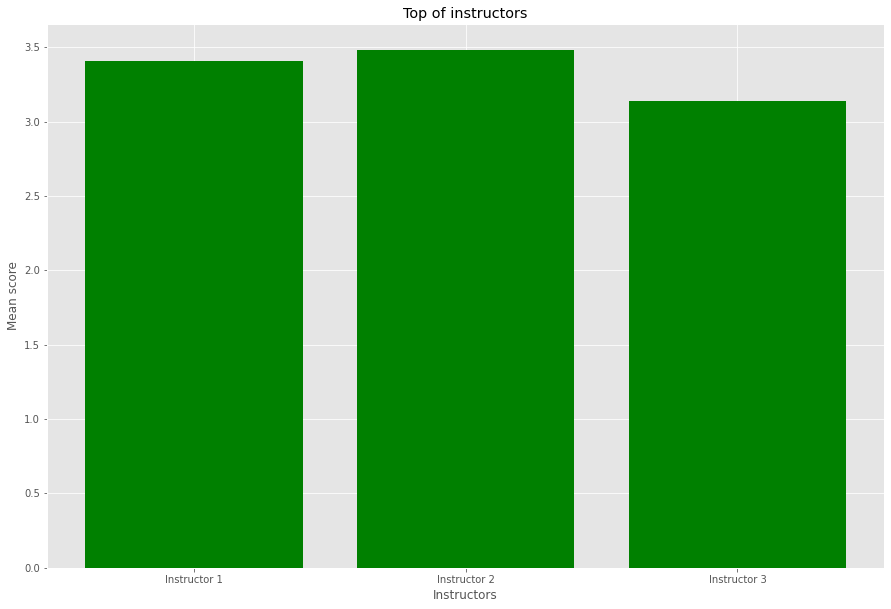

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

x = [f'Instructor {ind}' for ind in instr_quality.keys()]
vals = [instr_quality[ind] / instr_mentioned[ind] for ind in instr_quality.keys()]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, vals, color='green')
plt.xlabel("Instructors")
plt.ylabel("Mean score")
plt.title("Top of instructors")

plt.xticks(x_pos, x)

plt.show()

Инструктор под номером 2 - лучший!